<a href="https://colab.research.google.com/github/CANAL-amsterdam/Foundations-of-Cultural-and-Social-Data-Analysis/blob/main/05-statistics-essentials/05_chapter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "numpy<2,>=1.13" "pandas~=1.1" "matplotlib<4,>=2.1" "scipy<2,>=0.18" "scikit-learn>=0.19" "mpl-axes-aligner<2,>=1.1"

In [ ]:
import matplotlib.pyplot as plt

(chp-statistics-essentials)=
# Statistics Essentials: Who Reads Novels?

In [ ]:
# HIDE THIS CELL
import random, numpy; random.seed(1); numpy.random.seed(1);

(sec-statistics-essentials-introduction)=
## Introduction

```{margin}
See chapter {ref}`chp-intro-probability` for a cursory introduction to probability distributions.
```
This chapter describes the calculation and use of common <span class="index">summary statistics</span>. Summary statistics such as the <span class="index">mean</span>,
<span class="index">median</span>, and <span class="index">standard deviation</span> aspire to capture salient characteristics of a collection of values or, more precisely,
characteristics of an underlying (perhaps hypothesized) probability distribution generating the observed values. Summary statistics are a bit like paraphrases or abstracts of texts. With poetry you almost always want the poem itself (akin to knowledge of the underlying distribution) rather than the paraphrase (the summary statistic(s)). If, however, a text, such as a novel, is extremely long or staggeringly predictable, you may be willing to settle for a paraphrase. Summary statistics serve a similar function: sometimes we don't have sufficient time or (computer) memory to analyze or store all the observations from a phenomenon of interest and we settle for a summary, *faute de mieux*.  In other fortuitous cases, such as when we are working with data believed to be generated from a normal distribution, summary statistics may capture virtually all the information we care about. Summary statistics, like paraphrases, also have their use when communicating the results of an analysis to a broader audience who may not have time or energy to examine all the underlying data.

This chapter reviews the use of summary statistics to capture the location---often the "typical" value---and dispersion of a collection of observations. The use of summary statistics to describe the association between components of multivariate observations is also described. These <span class="index">summary statistics</span> are introduced in the context of an analysis of survey responses from the United States <span class="index">General Social Survey</span> (GSS). We will focus, in particular, on responses to a question about the reading of literature. We will investigate the question of whether respondents with certain demographic characteristics (such as higher than average income or education) are more likely to report reading novels (within the previous twelve months). We will start by offering a definition of a summary statistic before reviewing specific examples which are commonly encountered. As we introduce each statistic, we will offer an example of how the statistic can be used to analyze the survey responses from the GSS. Finally, this chapter also introduces a number of common statistics to characterize the relationship between variables.

A word of warning before we continue. The following review of summary statistics and their use is highly informal. The
goal of the chapter is to introduce readers to summary statistics frequently encountered in humanities data analysis. Some of these statistics lie at the core of applications that will be discussed in subsequent chapters in the book, such as the one on stylometry (see chapter {ref}`chp-stylometry`). A thorough treatment of the topic and, in particular, a discussion of the connection between summary statistics and parameters of probability distributions are found in standard textbooks (see e.g., chapter 6 of {cite:t}`casella2001statistical`).

(sec-statistics-essentials-statistics)=
## Statistics

A formal definition of a <span clas="index">statistic</span> is worth stating. It will, with luck, defamiliarize concepts we may use reflexively,
such as the sample mean and sample standard deviation. A statistic is a function of a collection of observations, $x_1,
x_2, \ldots, x_n$. (Such a collection will be referenced concisely as $x_{1:n}$.) For example, the <span class="index">sum</span> of
a sequence of values is a statistic. In symbols we would write this statistic as follows:

\begin{equation}\label{eq:sum}
T(x_{1:n}) = \sum_{i = 1}^n x_i
\end{equation}

Such a statistic would be easy to calculate using Python given a list of numbers `x` with `sum(x)`.

The <span class="index">maximum</span> of a sequence is a statistic. So too is the sequence's <span class="index">minimum</span>.  If we were to flip a coin 100 times and
record what happened (i.e., "heads" or "tails"), statistics of interest might include the proportion of times "heads"
occurred and the total number of times "heads" occurred. If we encode "heads" as the integer 1 and "tails" as the
integer 0, the statistic above, $T(x_{1:n})$, would record the total number of times the coin landed "heads".

Depending on your beliefs about the processes generating the observations of interest, some statistics may be more
informative than others. While the mean of a sequence is an important statistic if you believe your data comes from a
normal distribution, the maximum of a sequence is more useful if you believe your data were drawn from a uniform
distribution. A statistic is merely a function of a sequence of observed values. Its
usefulness varies greatly across different applications.

```{note}
Those with prior exposure to statistics and probability should note that this definition is
a bit informal. If the observed values are understood as realized values of random variables, as they often are, then
the statistic itself is a random quantity. For example, when people talk about the sampling distribution of a statistic, they are using this definition of a statistic.
```

There is no formal distinction between a summary statistic and statistic in the sense defined above.  If someone refers to a statistic as a summary statistic, however, odds are strongly in favor of that statistic being a familiar statistic widely used to capture location or dispersion, such as mean or variance.

(sec-statistics-essentials-location-and-dispersion)=
## Summarizing Location and Dispersion

In this section we review the definitions of the statistics discussed below, intended to capture <span class="index">location</span> and <span class="index">dispersion</span>: <span class="index">mean</span>, <span class="index">median</span>,
<span class="index">variance</span>, and <span class="index">entropy</span>. Before we describe these statistics, however, let us introduce the data we will be working with.

(sec-statistics-essentials-data)=
### Data: Novel reading in the United States

To illustrate the uses of statistics, we will be referring to a dataset consisting of survey responses from the [<span class="index">General Social Survey</span>](http://gss.norc.org/) (GSS) during the years 1998 and 2002. In particular, we will focus on responses to questions about the reading of literature.
The GSS is a national survey conducted in the United States since 1972. (Since 1994 the GSS has been conducted on even numbered years.) In 1998 and 2002 the GSS included questions related to culture and the arts.[^gss-details]
The GSS is particularly useful due to its accessibility---anyone may download and share the data---and due to the care with which it was assembled---the survey is conducted in person by highly trained interviewers. The GSS is also as close to a simple random sample of households in the United States (current population ~320 million) as it is feasible to obtain.[^simple-random-sample] Given the size and population of the United States, that the survey exists at all is noteworthy. Random samples of individuals such as those provided by the GSS are particularly useful because with them it is easy to make educated guesses both about characteristics of the larger distribution and the variability of the aforementioned guesses. For example, given a random sample from a normal distribution it is possible to estimate both the mean and the variability of this same estimate (the sampling error of the mean).

[^simple-random-sample]: A simple random sample of items in a collection is assembled by repeatedly selecting an item
  from the collection, given that the chance of selecting any specific item is equal to the chance of selecting any
  other item.

[^gss-details]: The official site for the General Social Survey is http://gss.norc.org/ and the data used in this
  chapter is the cumulative dataset "GSS 1972-2014 Cross-Sectional Cumulative Data (Release 5, March 24, 2016)" which
  was downloaded from http://gss.norc.org/get-the-data/stata on May 5, 2016. While this chapter only uses data from
  between 1998 and 2002, the cumulative dataset includes useful variables such as respondent income in constant dollar
  terms (``realrinc``), variables which are not included in the single-year datasets.

```{margin}
Respondents were also asked if they went to "a classical music or opera performance, not
including school performances". Answers to this question are recorded in the
[``gomusic``](https://gssdataexplorer.norc.org/variables/1412/vshow) variable.
```
In 1998 and 2002 respondents were asked if, during the last twelve months, they "[r]ead novels, short stories, poems, or
plays, other than those required by work or school". Answers were recorded in the [``readfict``](https://gssdataexplorer.norc.org/variables/2129/vshow) variable.
(Those familiar with GSS will want to know these, because this question was asked
as part of a larger survey, we have considerable additional demographic information about each person responding to the survey. This information allows us to create a compelling picture of people who are likely to say they read prose
fiction.

In addition to responses to the questions concerning reading activity and concert attendance, we will look
at the following named variables from the sample:

-   ``age``: Age of respondent
-   ``sex``: Sex of respondent (recorded by survey workers)
-   ``race``: Race of respondent (verbatim response to the question "What race do you consider yourself?")
-   ``reg16``: Region of residence when 16 years old ([New
    England](https://en.wikipedia.org/wiki/New_England), [Middle
    Atlantic](https://en.wikipedia.org/wiki/Mid-Atlantic_states),
    [Pacific](https://en.wikipedia.org/wiki/Pacific_States), etc.) A map showing the nine regions
    (in addition to "Foreign") is included below.
-   ``degree``: Highest educational degree earned (None, High School, Bachelor, Graduate degree)
-   ``realrinc``: Respondent's income in constant dollars (base = 1986)

![Geographic regions used by the United States Census Bureau.](https://github.com/CANAL-amsterdam/Foundations-of-Cultural-and-Social-Data-Analysis/blob/main/05-statistics-essentials/us_regdiv-0.png?raw=1)

```{tip}
The GSS contains numerous other variables which might form part of an interesting analysis. For
  example, the variable ``educ`` records the highest year of school completed and ``res16`` records the type of place
  the respondent lived in when 16 years old (e.g., rural, suburban, urban, etc.).
```

```{note}
"Race", in the context of the GSS, is defined as the verbatim response of the interviewee to the question, "What race do you consider yourself?" In other settings the term may be defined and used differently. For example, in another important survey, the United States Census, in which many individuals are asked a similar question, the term is defined according to a 1977 regulation which references ancestry {cite:p}`council2004measuring`. The statistical authority in Canada, the other large settler society in North America, discourages the use of the term entirely. Government statistical work in Canada makes use of variables such as "visible minority" and "ethnic origin", each with their own complex and changing definitions {cite:p}`governmentofcanada1998previous,governmentofcanada2015visible`.
```

The GSS survey results are distributed in a variety of formats. In our case, the GSS dataset resides in a file named
``GSS7214_R5.DTA``. The file uses an antiquated format from Stata, a proprietary non-free statistical software package.
Fortunately, the Pandas library provides a function, <span class="index">``pandas.read_stata()``</span>, which reads files using this format. Once we load
the dataset we will filter the data so that only the variables and survey responses of interest are included. In this
chapter, we are focusing on the above-mentioned variables from the years 1998, 2000, and 2002.

In [ ]:
# Dataset GSS7214_R5.DTA is stored in compressed form as GSS7214_R5.DTA.gz
import gzip
import pandas as pd

with gzip.open('data/GSS7214_R5.DTA.gz', 'rb') as infile:
    # we restrict this (very large) dataset to the variables of interest
    columns = ['id', 'year', 'age', 'sex', 'race', 'reg16', 'degree',
               'realrinc', 'readfict']
    df = pd.read_stata(infile, columns=columns)

# further limit dataset to the years we are interested in
df = df.loc[df['year'].isin({1998, 2000, 2002})]

Most respondents provide answers to the questions asked of them. In some cases, however, respondents
either do not know the answer to a question or refuse to provide an answer to the question. When an
individual does not provide an answer to a question, the GSS data records that value as missing. In
a ``DataFrame`` such a value is recorded as <span class="index">NaN</span> ("Not a Number", a standard value elsewhere used
to encode undefined floating-point values). Although handling missing data adds additional
complexity to an analysis, the methods for dealing with such data in surveys are well established
({cite:t}`hoff2009first`, 115--123). Because <span class="index">missing data</span> models are beyond the scope of this book we will
simply exclude records with missing values.

As the initial discussion of summary statistics describing <span class="index">location</span> focuses on the responses to the
question about the respondent's annual income, ``realrinc``, a question which some people decline to
answer, we will exclude records with missing values for this variable using the code below:

In [ ]:
# limit dataset to exclude records from individuals who refused
# to report their income
df = df.loc[df['realrinc'].notnull()]

In [ ]:
# HIDE THIS CELL
# REALITY CHECK, using GSS provided values
df.loc[df['year'] == 2000, 'realrinc'].astype(float).min() == 333;
round(df.loc[df['year'] == 2000, 'realrinc'].astype(float).mean(), 2) == 22110.13;

```{margin}
{cite:t}`hout2004getting` provides useful guidelines about interpreting variables related to income in the GSS.
```
As a final step, we need to adjust for inflation in the US dollar. Respondent's income ``realrinc``
is reported in constant 1986 US dollars. The following lines of code adjust the 1986 US
dollar quantities into 2015 terms. This is an important adjustment because the value of the US
dollar has declined considerably since 1986 due to inflation.  Inflation is calculated using the [<span class="index">US
Consumer Price Index</span>](https://en.wikipedia.org/wiki/United_States_Consumer_Price_Index) which
estimates the value of a dollar in a given year by recording how many dollars are required to
purchase a typical "market basket" of goods regularly and widely consumed. Using the US CPI we can
say that 100 dollars worth of groceries for a typical family in 1986 is equivalent to 215 dollars in
2015, for instance.

In [ ]:
# inflation measured via US Consumer Price Index (CPI), source:
# http://www.dlt.ri.gov/lmi/pdf/cpi.pdf
cpi2015_vs_1986 = 236.7 / 109.6
assert df['realrinc'].astype(float).median() < 24000  # reality check
df['realrinc2015'] = cpi2015_vs_1986 * df['realrinc'].astype(float)

After this preprocessing we can make a <span class="index">histogram</span> showing annual family income, grouped by
self-reported race (coded as "white", "black", or "other" by the GSS):

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Generic family 'sans-serif' not found because none of the following families were found: "Roboto Condensed Regular"


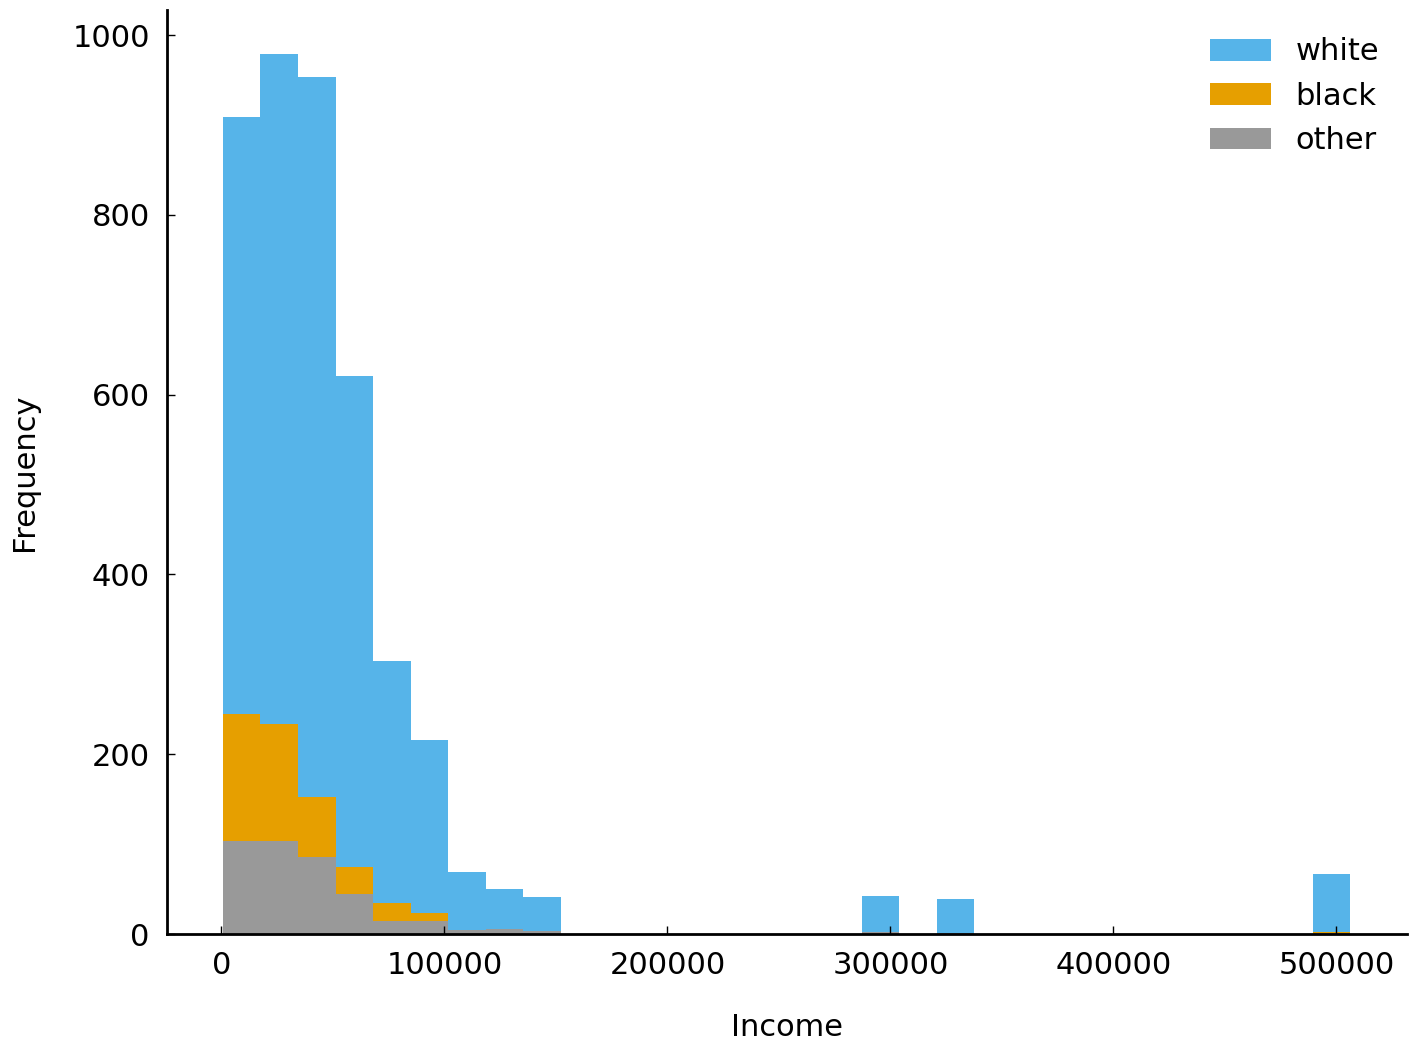

In [ ]:
import matplotlib.pyplot as plt
df.groupby('race')['realrinc2015'].plot(kind='hist', bins=30)
plt.xlabel('Income')
plt.legend();

<!-- Figure: Annual Household Income in constant 2015 US dollars.\label{fig-statistics-essentials-histogram-annual-family-income} -->

It is common practice to take the <span class="index">logarithm</span> of data which are <span class="index">skewed</span> or which, like income, are
commonly discussed in multiplicative terms (e.g., in North America and Europe it is far more common
to speak of a salary raise in percentage terms than in absolute terms). Converting data to a logarithmic scale has the benefit that larger differences in numeric quantities get mapped to a tinier scope. We will follow that practice
here. The following lines of code create a new variable ``realrinc2015_log10`` and generate a new
plot using the variable. In the new plot below, it is easier to visually estimate the typical annual
household income for each group. We can see, for example, that the typical income associated with
respondents who describe themselves as "white" is higher than the typical income associated with
respondents describing themselves as something other than "white".

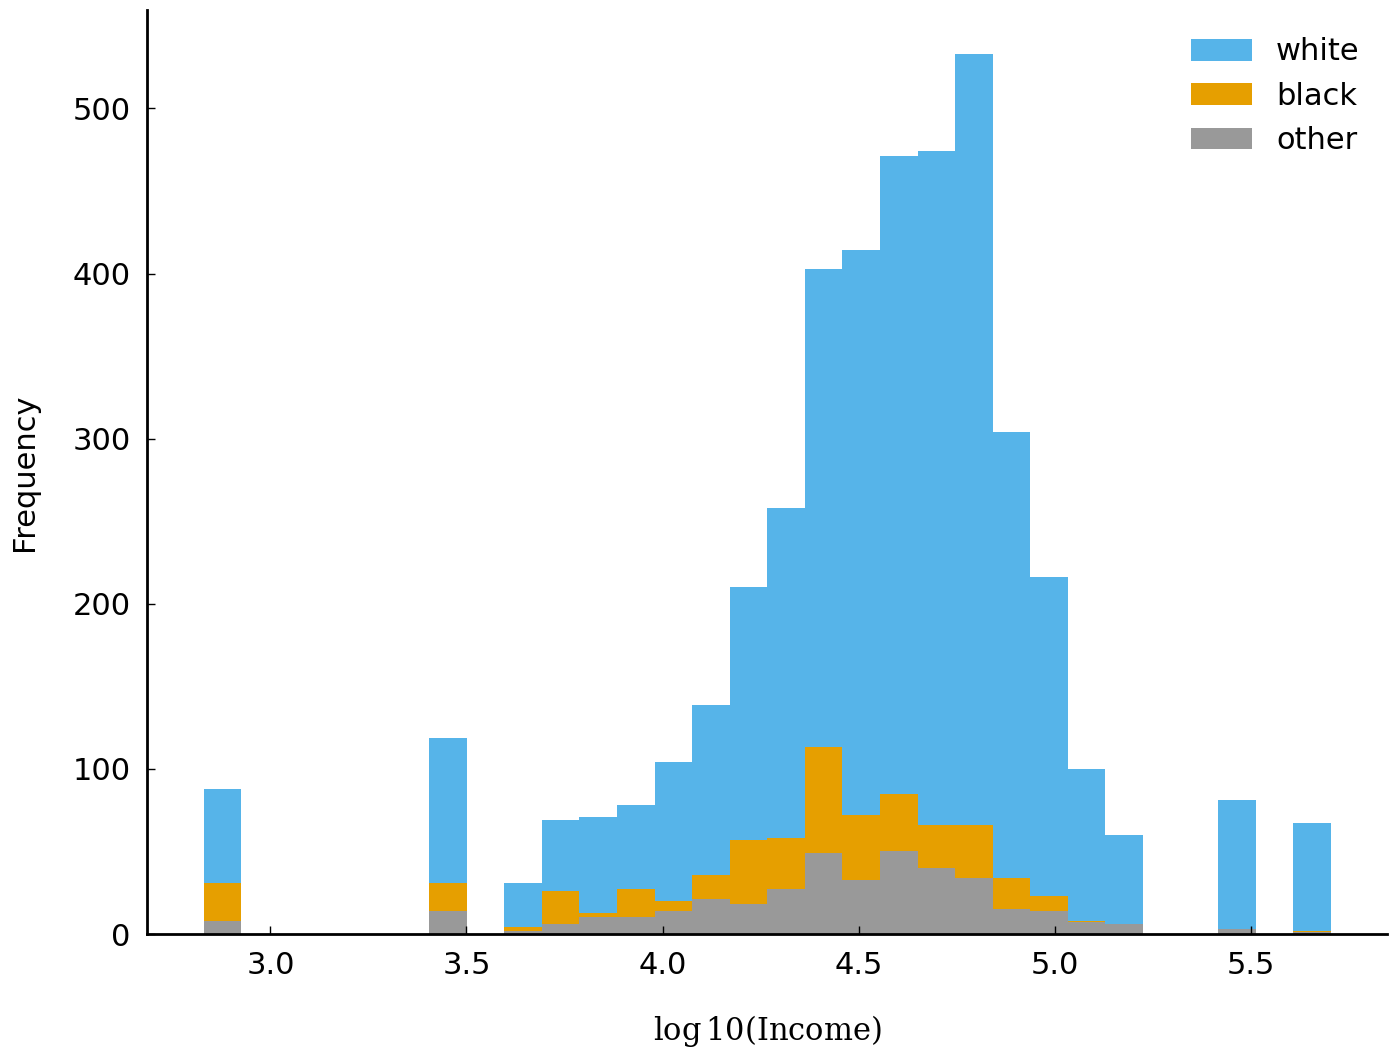

In [ ]:
import numpy as np

df['realrinc2015_log10'] = np.log10(df['realrinc2015'])
df.groupby('race')['realrinc2015_log10'].plot(kind='hist', bins=30)
plt.xlabel(r'$\log10(\mathrm{Income})$')
plt.legend();

<!-- Figure: Annual household income in 2015 US dollars (data converted to a logarithmic scale).\label{fig-statistics-essentials-histogram-annual-family-income-log10} -->

## Location
(sec-statistics-essentials-location)=

In the surveys conducted between 1998 and 2002, 5,447 individuals reported their annual income to survey workers. The
histogram above shows their responses. In this section we will look at common strategies for summarizing the values
observed in collections of samples such as the samples of reported household incomes. These strategies are particularly useful when we have too many observations to visualize or when we need to describe a dataset to others without transferring the dataset to them or without using visual aids such as histograms. Of course, it is difficult to improve on simply giving the entire dataset to an interested party: the best "summary" of a dataset is the dataset itself.

There is a great deal of diversity in reported household income. If we wanted to summarize the
characteristics we see, we have several options. We might report the ratio of the maximum value to
the lowest value, since this is a familiar kind of summary from the news in the present decade of the
twenty-first century: one often hears about the ratio of the income of the highest-paid employee at a
company to the income of the lowest-paid employee.  In this case, the ratio can be calculated using
the ``max()`` and ``min()`` methods associated with the series (an instance of ``pandas.Series``). Using
these methods accomplishes the same thing as using <span class="index">``numpy.min()``</span> or <span class="index">``numpy.max()``</span> on the underlying series.

In [ ]:
print(df['realrinc2015'].max() / df['realrinc2015'].min())

749.1342599999999


This shows that the wealthiest individual in our sample earns ~750 times more than the poorest individual. This
ratio has a disadvantage: it tells us little about the values between the maximum and the minimum.
If we are interested in, say, the number of respondents who earn more or less than $30,000, this
ratio is not an immediately useful summary.

To address this issue, let us consider more familiar summary statistics. Initially we will focus on
two summary statistics which aim to capture the "typical" value of a sample.  Such statistics are
described as measuring the <span class="index">*location*</span> of a distribution. (A reminder about terminology: a *sample* is always a sample from some underlying distribution.)

The first statistic is the average or <span class="index">*arithmetic mean*</span>. The arithmetic mean is the sum of observed values divided by
the number of values. While there are other "means" in circulation (e.g., geometric mean, harmonic mean), it is the
arithmetic mean which is used most frequently in data analysis in the humanities and social sciences. The mean of $n$
values ($x_1, x_2, \ldots, x_n$) is often written as $\bar x$ and defined to be:

\begin{equation}\label{eq:arithmetic-mean}
\bar x = \frac{1}{n} \sum_{i=1}^n x_i
\end{equation}

In Python, the mean can be calculated in a variety of ways: the ``pandas.Series`` method ``mean()``,
the ``numpy.ndarray`` method ``mean()``, the function ``statistics.mean()``, and the function
``numpy.mean()``. The following line of code demonstrates how to calculate the mean of our
``realrinc2015`` observations:

In [ ]:
print(df['realrinc2015'].mean())

51296.749024906276


The second widely used summary statistic is the <span class="index">median</span>. The median value of a sample or distribution is
the middle value: a value which splits the sample in two equal parts. That is, if we order the
values in the sample from least to greatest, the median value is the middle value. If there are an
even number of values in the sample, the median is the arithmetic mean of the two middle values. The
following shows how to calculate the median:

In [ ]:
print(df['realrinc2015'].median())

37160.92814781022


These two measures of location, mean and median, are often not the same. In this case they differ by
a considerable amount, more than \$14,000. This is not a trivial amount; \$14,000 is more than a third of the typical annual income of an individual in the United States according to the GSS.

```{margin}
While there was a recession in the United States between March 2001 and November 2001, it was brief.
Naturally it would be inappropriate to regard samples from the year 2006, 2008, and 2010 as samples from roughly the
same time period due to the financial crisis of 2007-–2008.
```
Consider, for example, the mean and the median household incomes for respondents with bachelor's degrees in 1998, 2000,
and 2002. Since our household income figures are in constant dollars and the time elapsed between surveys is short, we
can think of these subsamples as, roughly speaking, simple random samples (of different sizes) from the same underlying
distribution. That is, we should anticipate that, after adjusting for
inflation, the income distribution associated with a respondent with a bachelor's degree
is roughly the same; variation, in
this case, is due to the process of sampling and not any meaningful changes in the income distribution.

In [ ]:
df_bachelor = df[df['degree'] == 'bachelor']
# observed=True instructs pandas to ignore categories
# without any observations
df_bachelor.groupby(['year', 'degree'], observed=True)['realrinc2015'].agg(['size', 'mean', 'median'])

,,size,mean,median
year,degree,,,
1998,bachelor,363,63805.508302,48359.364964
2000,bachelor,344,58819.407571,46674.821168
2002,bachelor,307,85469.227956,50673.992929


We can observe that, in this sample, the mean is higher than the median and also more variable. This
provides a taste of the difference between these statistics as summaries. To recall the analogy we
began with: if summary statistics are like paraphrases of prose or poetry, the mean and median are
analogous different strategies for paraphrasing.

Given this, information we are justified in asking why the mean, as a strategy for summarizing data,
is so familiar and, indeed, more familiar than other summary statistics such as the median. One
advantage of the mean is that it is the unique "right" guess if you are trying to pick a single
number which will be closest to a randomly selected value from the sample when distance from the
randomly selected value is penalized in proportion to the *square* of the distance between the
number and the randomly selected value. The median does not have this particular property.

A dramatic contrast between the median and mean is visible if we consider what happens if our data
has one or more corrupted values. Let's pretend that someone accidentally added an extra "0" to one
of the respondent incomes when they were entering the data from the survey worker into a computer.
(This particular error is common enough that it has a moniker: it is an error due to a "fat
finger".) That is, instead of \$143,618, suppose the number \$1,436,180 was entered. This small mistake has a severe impact on the mean:

In [ ]:
realrinc2015_corrupted = [11159, 13392, 31620, 40919, 53856, 60809, 118484, 1436180]
print(np.mean(realrinc2015_corrupted))

220802.375


By contrast, the median is not changed:

In [ ]:
print(np.median(realrinc2015_corrupted))

47387.5


Because the median is less sensitive to extreme values it is often labeled a "robust" statistic.

An additional advantage of the <span class="index">median</span> is that it is typically a value which actually occurs in the
dataset. For example, when reporting the median income reported by the respondents there is
typically at least one household with an income equal to the median income. With respect to income,
*this particular household* is the typical household.  In this sense there is an identified household which receives
a typical income or has a typical size. By contrast, there are frequently no households associated
with a mean value. The mean number of children in a household might well be 1.5 or 2.3, which does
not correspond to any observed family size.

If transformed into a suitable numerical representation, <span class="index">categorical data</span> can also be described
using the mean. Consider the non-numeric responses to the ``readfict`` question. Recall that the
``readfict`` question asked respondents if they had read any novels, short stories, poems, or plays
not required by work or school in the last twelve months. Responses to this question were either "yes"
or "no". If we recode the responses as numbers, replacing "no" with 0 and "yes" with 1, nothing
prevents us from calculating the mean or median of these values.

In [ ]:
readfict_sample = df.loc[df['readfict'].notnull()].sample(8)['readfict']
readfict_sample = readfict_sample.replace(['no', 'yes'], [0, 1])
readfict_sample

37731    0
42612    1
37158    1
35957    1
41602    1
42544    1
35858    0
36985    1
Name: readfict, dtype: int64

In [ ]:
print("Mean:", readfict_sample.mean())
print("Median:", readfict_sample.median())

Mean: 0.75
Median: 1.0


## Dispersion
(sec-statistics-essentials-dispersion)=

Just as the mean or median can characterize the "typical value" in a series of numbers, there also exist many ways to describe the diversity of values found in a series of numbers. This section reviews descriptions frequently used in quantitative work in the humanities and social sciences.

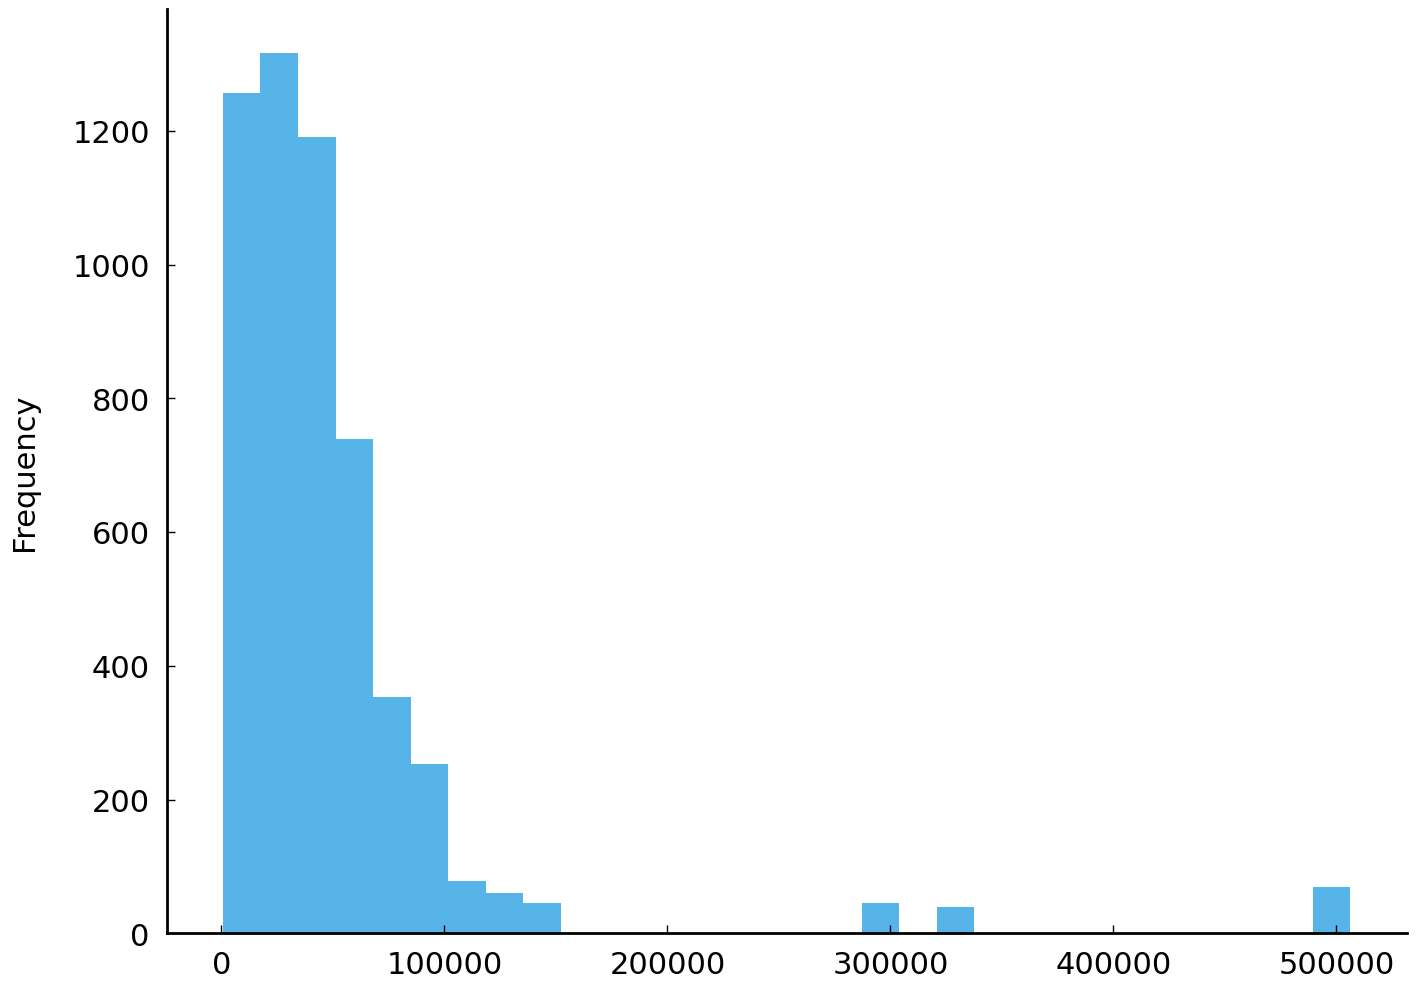

In [ ]:
import matplotlib.pyplot as plt

df['realrinc2015'].plot(kind='hist', bins=30);

<!-- Figure: Household Income (2015 US Dollars).\label{fig-statistics-essentials-household-income} -->

The plot shows all respondents' reported household income. The mean income is roughly
\$51,000. Reported incomes vary considerably. Contrast the figure above with the histogram
of a fictitious set of simulated incomes below:

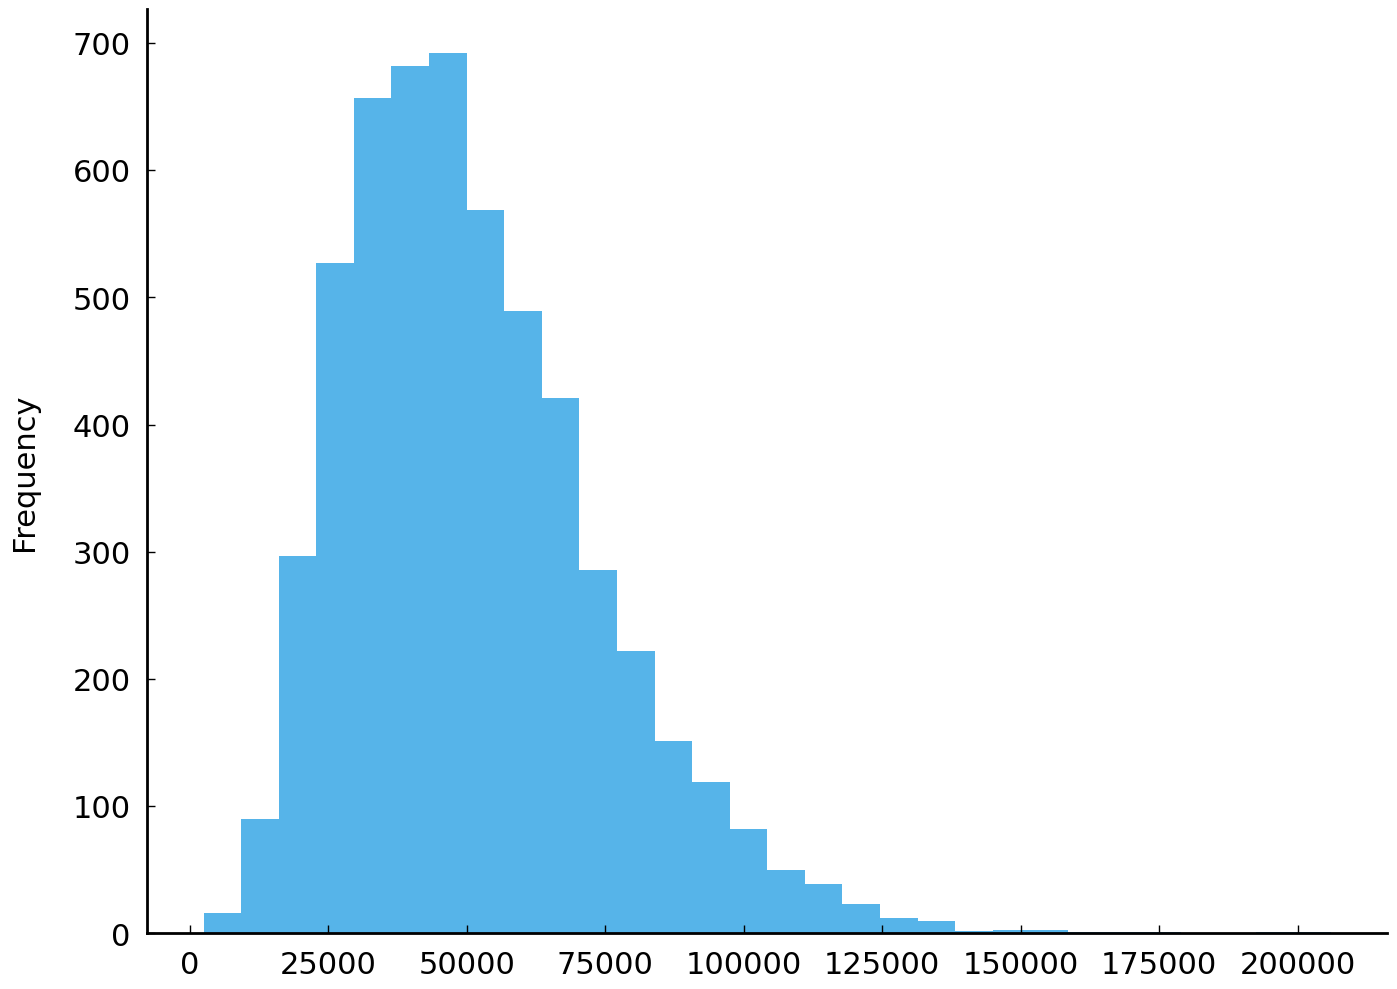

In [ ]:
# simulate incomes from a gamma distribution with identical mean
alpha = 5
sim = np.random.gamma(alpha, df['realrinc2015'].mean() / alpha, size=df.shape[0])
sim = pd.Series(sim, name='realrinc2015_simulated')
sim.plot(kind='hist', bins=30);

<!-- Figure: Histogram of a fictitious set of incomes.\label{fig-statistics-essentials-fictitious-incomes} -->

The two series visualized above may look different, but they are also similar. For example, they each have the same number of observations ($n$ =
5447) and a common mean. But the observations clearly come from different distributions. The figures
make clear that one series is more concentrated than the other. One way to quantify this
impression is to report the <span class="index">*range*</span> of each series. The range is the maximum value in a series minus
the minimum value.

In [ ]:
# HIDE THIS CELL
# REALITY CHECK
import math
math.isclose(df['realrinc2015'].mean(), np.mean(sim), rel_tol=0.01);

In [ ]:
# Name this function `range_` to avoid colliding with the built-in
# function `range`.
def range_(series):
    """Difference between the maximum value and minimum value."""
    return series.max() - series.min()


print(f"Observed range: {range_(df['realrinc2015']):,.0f}\n"
      f"Simulated range: {range_(sim):,.0f}")

Observed range: 505,479
Simulated range: 203,543


The range of the fictitious incomes is much less than the range of the observed respondent incomes.
Another familiar measure of the dispersion of a collection of numeric values is the sample
<span class="index">*variance*</span> and its square root, the sample <span class="index">*standard deviation*</span>. Both of these are available for Pandas `Series`:

In [ ]:
print(f"Observed variance: {df['realrinc2015'].var():.2f}\n"
      f"Simulated variance: {sim.var():.2f}")

Observed variance: 4619178856.92
Simulated variance: 536836056.00


In [ ]:
print(f"Observed std: {df['realrinc2015'].std():.2f}\n"
      f"Simulated std: {sim.std():.2f}")

Observed std: 67964.54
Simulated std: 23169.72


The sample variance is defined to be, approximately, the mean of the squared deviations from the
mean. In symbols this reads:

\begin{equation}\label{eq:sample-variance}
s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar x)^2
\end{equation}

```{margin}
The estimate is more reliable in the sense that it will be closer to the variance of the
underlying distribution as the number of samples increase, when the underlying
distribution has a defined variance.
```
The $n-1$ in the denominator (rather than $n$) yields a more reliable estimate of the variance of
the underlying distribution. When dealing with a large number of observations the
difference between $\frac{1}{n-1}$ and $\frac{1}{n}$ is negligible. The ``std()`` methods of a
``DataFrame`` and ``Series`` use this definition as does Python's <span class="index">``statistics.stdev()``</span>.
Unfortunately, given the identical function name, <span class="index">``numpy.std()``</span> uses a different definition and must be
instructed, with the additional parameter ``ddof=1`` to use the corrected estimate. The following
block of code shows the various ``std`` functions available and their results.

In [ ]:
# The many standard deviation functions in Python:
import statistics

print(f"statistics.stdev: {statistics.stdev(sim):.1f}\n"
      f"         sim.std: {sim.std():.1f}\n"
      f"          np.std: {np.std(sim):.1f}\n"
      f"  np.std(ddof=1): {np.std(sim, ddof=1):.1f}")

statistics.stdev: 23169.7
         sim.std: 23169.7
          np.std: 23167.6
  np.std(ddof=1): 23169.7


Other common measures of dispersion include the <span class="index">mean absolute deviation</span> (around the mean) and the <span class="index">interquartile range</span>
(<span class="index">IQR</span>). The mean absolute deviation is defined, in symbols, as $\frac{1}{n} \sum_{i=1}^n \lvert x_i - \bar x \rvert$. In
Python we can calculate the mean absolute deviation using the <span class="index">``mad()``</span> method associated with the ``Series`` and
``DataFrame`` classes. In this case we could write: ``df['realinc'].mad()``. The IQR is the difference between the upper
and lower quartiles (the interquartile range or IQR). The IQR may be familiar from the ``boxplot`` visualization. Box
plots use the IQR to bound the rectangle (the "box"). In our series, the 25th percentile is \$20,000 and the 75th
percentile is \$61,000. The boxes in the box plots shown in figure {ref}`fig-statistics-essentials-realrinc-boxplots` have width equal to the
IQR.

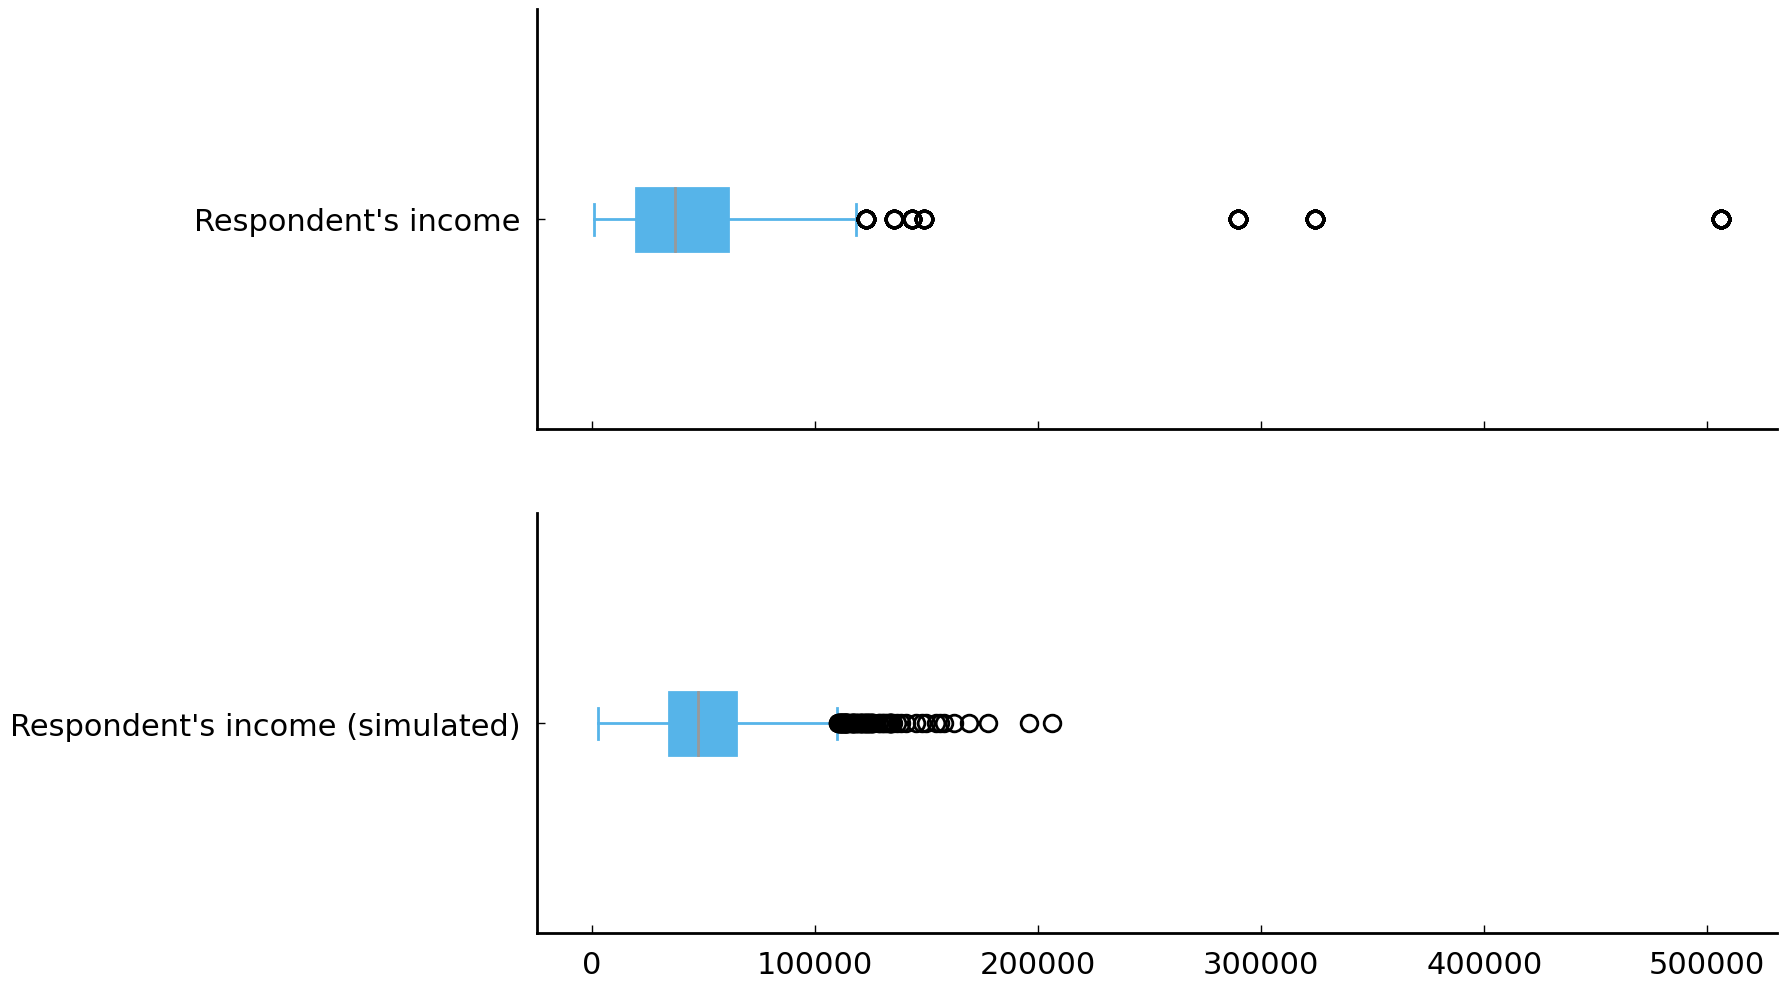

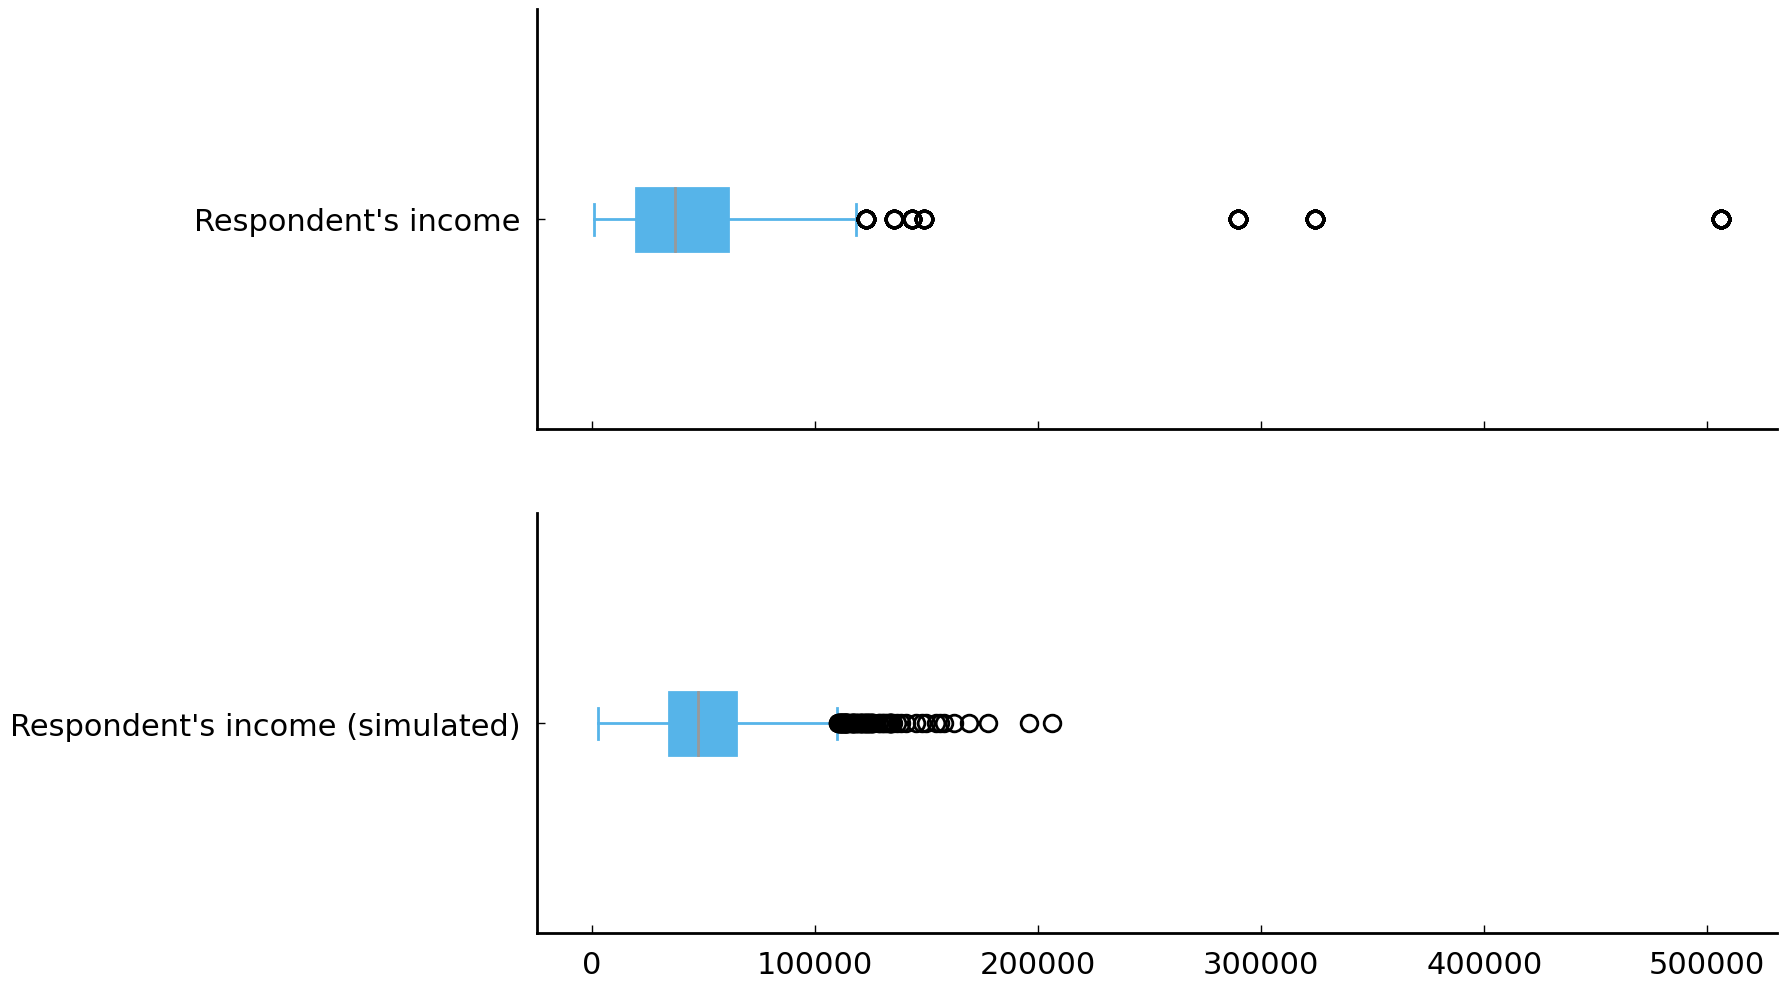

In [ ]:
# HIDE THIS CELL, JUST FOR PLOT
from myst_nb import glue

fig, axes = plt.subplots(2, sharex=True)
df['realrinc2015'].plot(kind='box', vert=False, ax=axes[0])
axes[0].set_yticklabels(["Respondent's income"])
sim.plot(kind='box', vert=False, ax=axes[1])
axes[1].set_yticklabels(["Respondent's income (simulated)"]);

glue("fig_income", fig, display=False)

```{glue:figure} fig_income
---
name: fig-statistics-essentials-realrinc-boxplots
---

<span class="index">Box plot</span>s of observed and simulated values for household income in constant 2015 US dollars.
```

Depending on the context, one measure of dispersion may be more appropriate than another. While the
range is appealing for its simplicity, if the values you are interested in might be modeled as
coming from a distribution with heavy or long "tails" then the range can be sensitive to sample size.

Equipped with several measures of dispersion, we can interrogate the GSS and ask if we see patterns
in income that we anticipate seeing. Is income more variable among respondents who graduate
from university than it is among respondents whose highest degree is a high school diploma? One piece of
evidence which would be consistent with an affirmative answer to the question would be seeing
greater mean absolute deviation of income among respondents with a bachelor's degree than among
respondents with only a high school diploma:

In [ ]:
df.groupby('degree')['realrinc2015'].mad().round()

degree
lt high school    19551.0
high school       23568.0
junior college    33776.0
bachelor          45055.0
graduate          77014.0
Name: realrinc2015, dtype: float64

Given the question we began this chapter with, we might also investigate whether or not there is an
association with reading fiction and variability in respondents' incomes. To keep things simple, we
will limit ourselves to respondents with bachelor's or graduate degrees:

In [ ]:
df_bachelor_or_more = df[df['degree'].isin(['bachelor', 'graduate'])]
df_bachelor_or_more.groupby(['degree', 'readfict'], observed=True)['realrinc2015'].mad().round()

degree    readfict
bachelor  yes          48908.0
          no          119523.0
graduate  yes          82613.0
          no          133028.0
Name: realrinc2015, dtype: float64

The greater variability is being driven largely by the fact that respondents who do not report
reading fiction tend to earn more. Looking at the means of these subgroups offers additional context:

In [ ]:
df_bachelor_or_more.groupby(['degree', 'readfict'], observed=True)['realrinc2015'].mean().round()

degree    readfict
bachelor  yes          71251.0
          no          139918.0
graduate  yes         113125.0
          no          153961.0
Name: realrinc2015, dtype: float64

One can imagine a variety of narratives or generative models which might offer an account of this difference. Checking any one of these narratives would likely require more detailed information about individuals than is available from the GSS.

The question of who reads (or writes) prose fiction has been addressed by countless researchers. Well-known studies include {cite:t}`hoggart1957uses`, {cite:t}`williams1961long`, {cite:t}`radway1991reading`, and {cite:t}`radway1999feeling`. {cite:t}`felski2008uses` and {cite:t}`collins2010bring` are examples of more recent work. Useful general background on the publishing industry during the period when the surveys were fielded can be found in {cite:t}`thompson2012merchants`.

### Variation in categorical values
(sec-statistics-essentials-variation)=

Often we want to measure the diversity of categorical values found in a dataset. Consider the
following three imaginary groups of people who report their educational background in the same form
that is used on the GSS. There are three groups of people, and there are eight respondents in each group.

In [ ]:
group1 = ['high school', 'high school', 'high school', 'high school', 'high school',
          'high school', 'bachelor', 'bachelor']
group2 = ['lt high school', 'lt high school', 'lt high school', 'lt high school',
          'high school', 'junior college', 'bachelor', 'graduate']
group3 = ['lt high school', 'lt high school', 'high school', 'high school',
          'junior college', 'junior college', 'bachelor', 'graduate']

In [ ]:
# calculate the number of unique values in each group
print([len(set(group)) for group in [group1, group2, group3]])
# calculate the ratio of observed categories to total observations
print([len(set(group)) / len(group) for group in [group1, group2, group3]])

[2, 5, 5]
[0.25, 0.625, 0.625]


The least diverse group of responses is group 1. There are only two distinct values ("types") in group
1 while there are five distinct values in group 2 and group 3.

Counting the number (or proportion of) distinct values is a simple way to measure
diversity in small samples of categorical data. But counting the number of distinct values
only works with small samples (relative to the number of categories) of the same size. For example, counting the number of distinct `degree`s reported for each region in the United States will not work because all possible values occur at least once (i.e., five distinct degrees occur in each region). Yet we know that some regions have greater variability of `degree` types, as table {numref}`tbl-statistics-essentials-proportion-degree-type` shows. To simplify things, Table {numref}`tbl-statistics-essentials-proportion-degree-type` shows only three regions: East South Central, New England, and Pacific.

In [ ]:
from myst_nb import glue

# HIDE THIS CELL, JUST FOR TABLE
# East South Central States are Alabama, Kentucky, Mississippi, Tennessee
regions_oi = sorted(['pacific', 'e. sou. central', 'new england'])
df_regions = df.loc[df['reg16'].isin(regions_oi)].copy()
df_regions['reg16'] = df_regions['reg16'].cat.remove_unused_categories()
glue("df", df_regions.groupby('reg16')['degree'].value_counts(normalize=True).round(1).to_frame(), display=False)

degree
reg16                                 
new england     high school        0.5
                bachelor           0.3
                graduate           0.1
                junior college     0.1
                lt high school     0.1
e. sou. central high school        0.6
                lt high school     0.1
                bachelor           0.1
                junior college     0.1
                graduate           0.1
pacific         high school        0.5
                bachelor           0.2
                junior college     0.1
                graduate           0.1
                lt high school     0.1

```{glue:figure} df
:name: tbl-statistics-essentials-proportion-degree-type

Proportion of respondents in indicated region of the United States with named degree type. Data for three regions shown: East South Central, New England, and Pacific.
```

We would still like to be able to summarize the variability in observed categories, even in situations when the number of distinct categories observed is the same. Returning to our three groups of people, we can see that group 2 and group 3 have the same number of distinct categories. Yet group 3 is more diverse than group 2; group 2 has one member of classes "high school", "junior college", "bachelor", and "graduate". This is easy to see if we look at a table of degree counts by group, {numref}`tbl-statistics-essentials-degree-counts-by-group`.

```{table} Degree counts by group
---
name: tbl-statistics-essentials-degree-counts-by-group
---

|         |                | Count |
|---------|----------------|-------|
| Group 1 | high school    | 6     |
|         | bachelor       | 2     |
|         | lt high school | 4     |
|         | high school    | 1     |
|---------|----------------|-------|
| Group 2 | junior college | 1     |
|         | bachelor       | 1     |
|         | graduate       | 1     |
|         | lt high school | 2     |
|         | high school    | 2     |
|---------|----------------|-------|
| Group 3 | junior college | 2     |
|         | bachelor       | 1     |
|         | graduate       | 1     |
```


```{margin}
The Simpson Index and the Herfindahl–Hirschman Index are other frequently encountered
measures of diversity. These measures capture essentially the same information as Shannon
entropy.
```
Fortunately, there is a measure from information theory which distills judgments of diversity among categorical values
into a single number. The measure is called <span class="index">*entropy*</span> (more precisely, <span class="index">*Shannon entropy*</span>). One way to appreciate how this measure works is to consider the task of identifying what category a survey respondent belongs to using only questions which have a "yes" or a "no" response. For example, suppose the category whose diversity you are interested in quantifying is highest educational degree and a survey
respondent from ``group2`` has been selected at random. Consider now the following question: what is the *minimum*
number of questions we will have to ask this respondent *on average* in order to determine their educational background?
Group 2 has respondents with self-reported highest degrees shown above.  Half the respondents have an educational
background of ``lt high school`` so half of the time we will only need to ask a single question, "Did you graduate from
high school?", since the response will be "no". The other half of the time we will need to ask additional questions. No
matter how we order our questions, we will sometimes be forced to ask three questions to determine a respondent's
category. The number of questions we need to ask is a measure of the heterogeneity of the group. The more heterogeneous,
the more "yes or no" questions we need to ask. The less heterogeneous, the fewer questions we need to ask. In the
extreme, when all respondents are in the same category, we need to ask zero questions since we know which category a
randomly selected respondent belongs to.

If the frequency of category membership is equal, the average number of "yes or no" questions we
need to ask is equal to the (Shannon) entropy. Although the analogy breaks down when the frequency
of category membership is not equal, the description above is still a useful summary of the concept.
And the analogy breaks down for very good reasons: although it is obvious that with two categories one
must always ask at least one question to find out what category a respondent belongs to, we still
have the sense that it is important to distinguish---as entropy does in fact do---between situations
where 90% of respondents are in one of two categories and situations where 50% of respondents are in
one of two categories.

```{tip}
A useful treatment of entropy for those encountering it for the first time is found in {cite:t}`frigg2011entropy`.
```

While <span class="index">entropy</span> is typically used to describe probability distributions, the measure is also used
to describe samples. In the case of samples, we take the observed frequency distribution as an
estimate of the distribution over categories of interest. If we have $K$ categories of interest and
$p_k$ is the empirical probability of drawing an instance of type $k$, then the entropy (typically
denoted $H$) of the distribution is:

\begin{equation}\label{eq:entropy}
H = - \sum_{k=1}^K p_k \log(p_k).
\end{equation}

```{margin}
In the calculation of entropy, $0 \cdot \log(0)$ is equal to zero. This can be the source of some confusion since in other
settings $\log(0)$ is not defined.  In Python ``0 * math.log(0)`` raises a ``ValueError``, for
instance. The argument in favor of $0 \cdot \log(0) = 0$ rests on an investigation of the limit of
the expression, $\lim_{x \searrow 0} x \cdot \log(x)$.
```
The unit of measurement for entropy depends on the base of the logarithm used. The base used in the calculation of entropy is either 2
or $e$, leading to measurements in terms of "bits" or "nats" respectively. Entropy can be calculated in Python using the
function <span class="index">``scipy.stats.entropy()``</span> which will accept a finite probability distribution or an
unnormalized vector of category counts. That ``scipy.stats.entropy()`` accepts a sequence of category
counts is particularly useful in this case since it is just such a sequence which we have been using
to describe our ``degree`` diversity.

The following block illustrates that entropy aligns with our expectations about the diversity of the
simulated groups of respondents (``group1``, ``group2``, ``group3``) mentioned earlier. (Note that
``scipy.stats.entropy()`` measures entropy in nats by default.)

In [ ]:
import collections
import scipy.stats

# Calculate the entropy of the empirical distribution over degree
# types for each group
for n, group in enumerate([group1, group2, group3], 1):
    degree_counts = list(collections.Counter(group).values())
    H = scipy.stats.entropy(degree_counts)
    print(f'Group {n} entropy: {H:.1f}')

Group 1 entropy: 0.6
Group 2 entropy: 1.4
Group 3 entropy: 1.6


As we can see, ``group1`` is the least diverse and ``group3`` is the most diverse. The diversity of
``group2`` lies between the diversity of ``group1`` and ``group3``. This is what we anticipated.

Now that we have a strategy for measuring the variability of observed types, all that remains is to apply it to the data of interest. The following block illustrates the use of entropy to compare the variability of responses to the `degree` question for respondents in different regions of the United States:

In [ ]:
df.groupby('reg16')['degree'].apply(lambda x: scipy.stats.entropy(x.value_counts()))

reg16
foreign            1.505782
new england        1.345351
middle atlantic    1.321904
e. nor. central    1.246287
w. nor. central    1.211067
south atlantic     1.261397
e. sou. central    1.196932
w. sou. central    1.290568
mountain           1.214591
pacific            1.283073
Name: degree, dtype: float64

Looking at the entropy values we can see that respondents from the New England states
report having a greater diversity of educational backgrounds than respondents in other states.
Entropy here gives us similar information as the proportion of distinct values but the measure is
both better aligned with our intuitions about diversity and usable in a greater variety of
situations.


(sec-statistics-essentials-measuring-association)=
## Measuring Association

(sec-statistics-essentials-measuring-association-numbers)=
### Measuring association between numbers

When analyzing data, we often want to characterize the association between two variables. To return to
the question we began this chapter with---whether respondents who report having certain
characteristics are more likely to read novels---we might suspect that
knowing that a region has an above average percentage of people with an advanced degree
would "tell us something" about the answer to the question of whether or not an above average
percentage has read a work of fiction recently. Informally, we would say that we suspect higher
levels of education are associated with higher rates of fiction reading. In this section we will
look at two formalizations of the idea of association: the <span class="index">correlation coefficient</span> and the <span class="index">rank correlation coefficient</span>.

In this section we have tried to avoid language which implies that a causal relationship exists between any two variables. We do not intend to discuss the topic of causal relationships in this chapter. Two variables may be associated for any number of reasons. Variables may also be associated by chance.

One association that is visible in the data is that older individuals tend to have higher incomes. To examine the relationship more closely we will first restrict our sample of the GSS to a
relatively homogeneous population: respondents between the ages of 23 and 30 with a bachelor's
degree. To further restrict our sample to individuals likely to be employed full-time, we will also
exclude any respondents with an annual income of less than \$10,000. The first block of code below
assembles the subsample. The second block of code creates a scatter-plot allowing us to see the
relationship between age and income in the subsample.

In [ ]:
df_subset_columns = ['age', 'realrinc2015_log10', 'reg16', 'degree']
min_income = 10_000
df_subset_index_mask = ((df['age'] >= 23) & (df['age'] <= 30) &
                        (df['degree'] == 'bachelor') &
                        (df['realrinc2015'] > min_income))
df_subset = df.loc[df_subset_index_mask, df_subset_columns]
# discard rows with NaN values
df_subset = df_subset[df_subset.notnull().all(axis=1)]
# age is an integer, not a float
df_subset['age'] = df_subset['age'].to_numpy().astype(int)

In the block of code above we have also removed respondents with NA values (non-response, "I don't
know" responses, etc.) for ``degree`` or ``age``. Without any NaN's to worry about we can convert
``age`` into a ``Series`` of integers (rather than floating-point values).

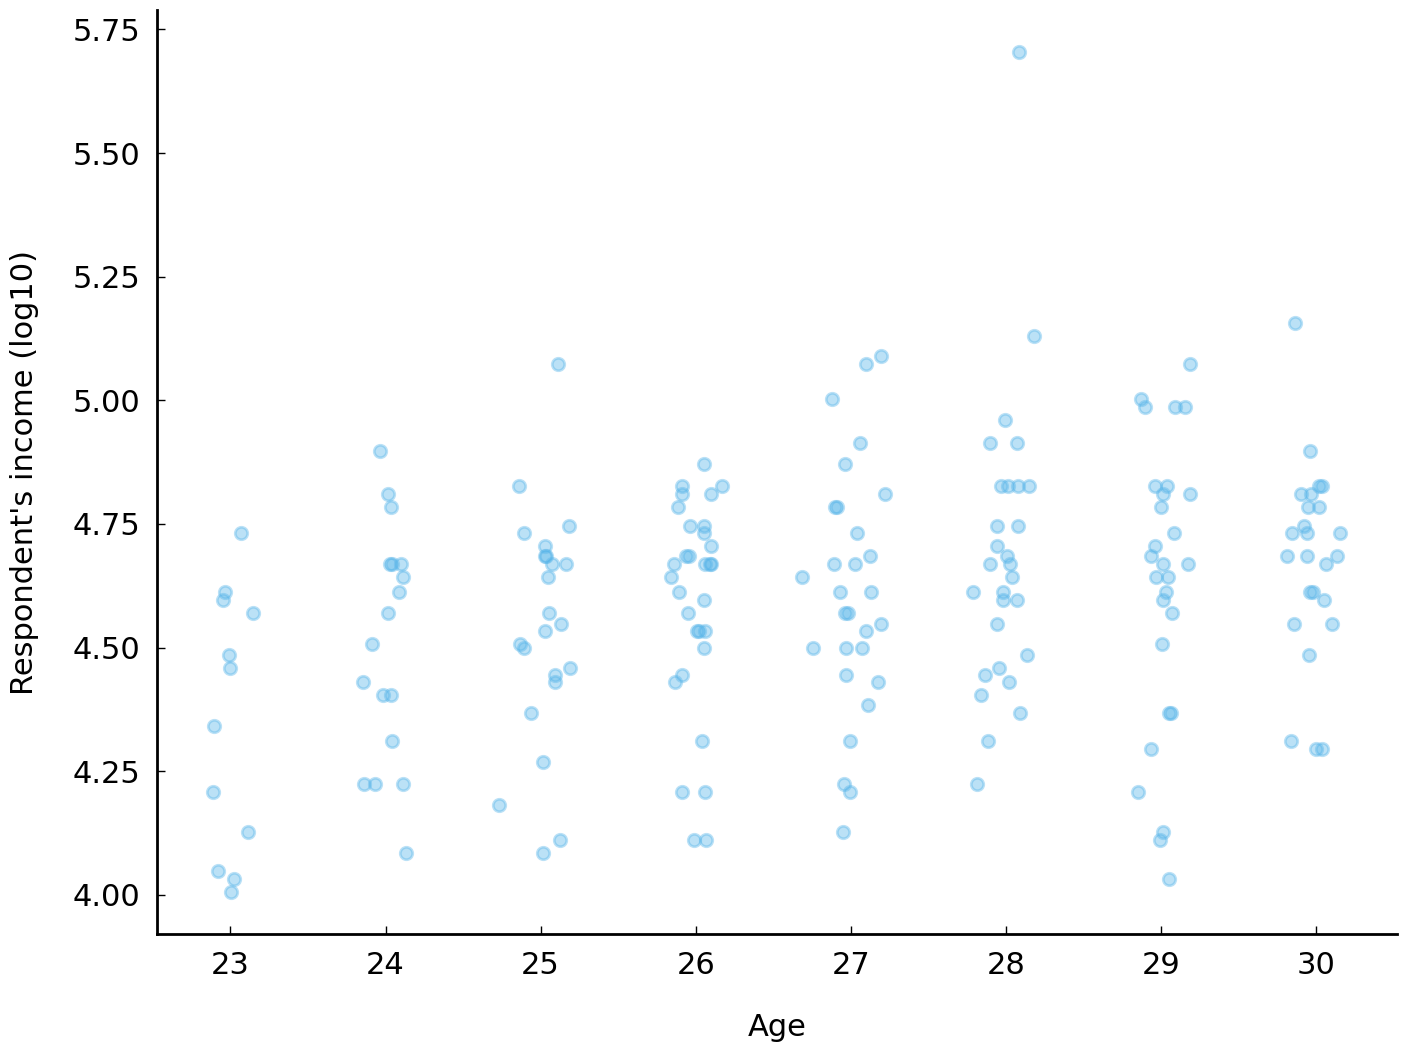

In [ ]:
# Small amount of noise ("jitter") to respondents' ages makes
# discrete points easier to see
_jitter = np.random.normal(scale=0.1, size=len(df_subset))
df_subset['age_jitter'] = df_subset['age'].astype(float) + _jitter
ax = df_subset.plot(x='age_jitter', y='realrinc2015_log10', kind='scatter', alpha=0.4)
ax.set(ylabel="Respondent's income (log10)", xlabel="Age");

<!-- Figure: Relationship between household income and age (<span class="index">jitter</span> added) of respondent.\label{fig:chp-statistics-essentials-household-income} -->

In [ ]:
# HIDE THIS CELL
# calculate values used in paragraph below
x, y = np.arange(23, 31), df_subset.groupby('age')['realrinc2015_log10'].median()
slope, intercept = np.polyfit(x, y, deg=1)
[slope.round(3), intercept.round(2), (10**slope - 1).round(2), y[[23, 30]].round(1), (10**y[[23, 30]]).round(-3)];

The income of respondents with bachelor's degrees tends to increase with age. The median income of a
23-year-old with a bachelor's degree is roughly \$25,000 ($10^{4.4}$) and the median income of a 30-year-old with a bachelor's degree is roughly \$48,000 ($10^{4.7}$). Looking at the incomes for
respondents with ages between 23 and 30, it seems like median income increases about 8% each
year. Using the $\log_{10}$ scale, we express this by saying that log income rises by 0.035 each year
($10^{0.035} - 1 \approx 8\%$). This account of the relationship between income
and age (between 23 and 30) is sufficiently simple that it can be captured in an equation which
relates log income to age: $\text{log income} \approx 0.035 \times \text{age} + 3.67$. This equation conveniently provides a procedure for estimating log income of a respondent given their age: multiply their age
by the number 0.035 and add 3.67.

This equation also describes a line. The following code block overlays this line on the
first scatter plot:

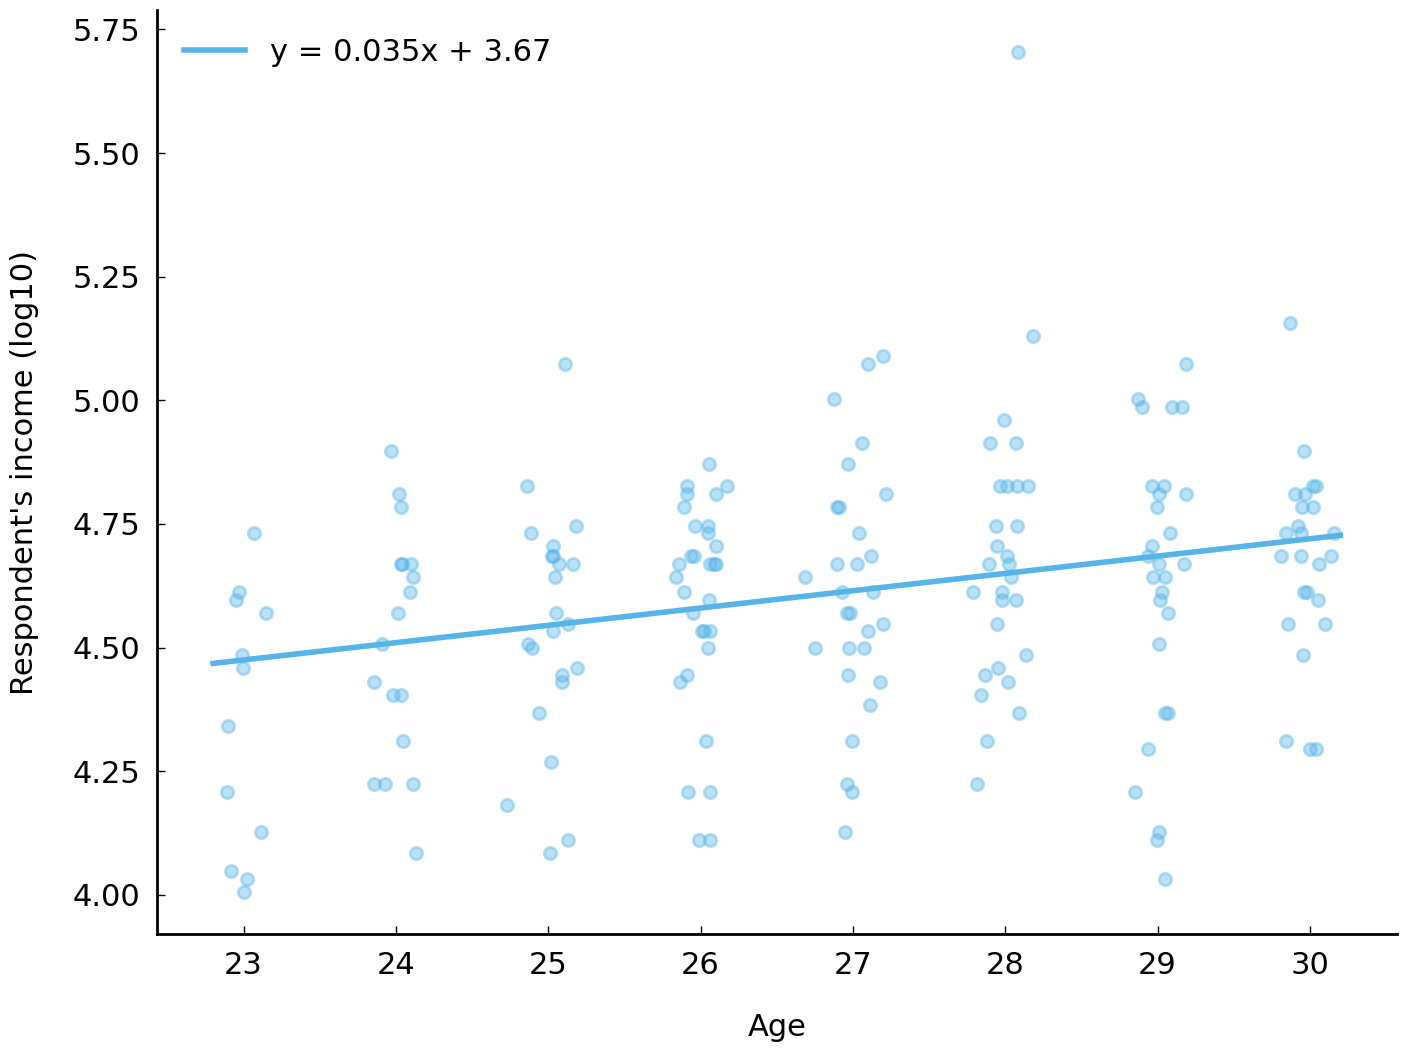

In [ ]:
ax = df_subset.plot(x='age_jitter', y='realrinc2015_log10', kind='scatter', alpha=0.4)
slope, intercept = 0.035, 3.67
xs = np.linspace(23 - 0.2, 30 + 0.2)
label = f'y = {slope:.3f}x + {intercept:.2f}'
ax.plot(xs, slope * xs + intercept, label=label)
ax.set(ylabel="Respondent's income (log10)", xlabel="Age")
ax.legend();

<!-- Figure: Relationship between household income and age (jitter added) of respondent. The line proposes a linear relationship between the two variables.\label{fig-statistics-essentials-household-income-line} -->

There are other, less concise, ways of describing the relationship between log income and age. For
example, the <span class="index">*curve*</span> in {numref}`fig-statistics-essentials-quadratic-household-income-age` does seem to summarize the association between log income and age better. In particular, the curve seems to capture a feature of the association visible in the data: that the association between age and income decreases over time. A curve
captures this idea. A straight line cannot.

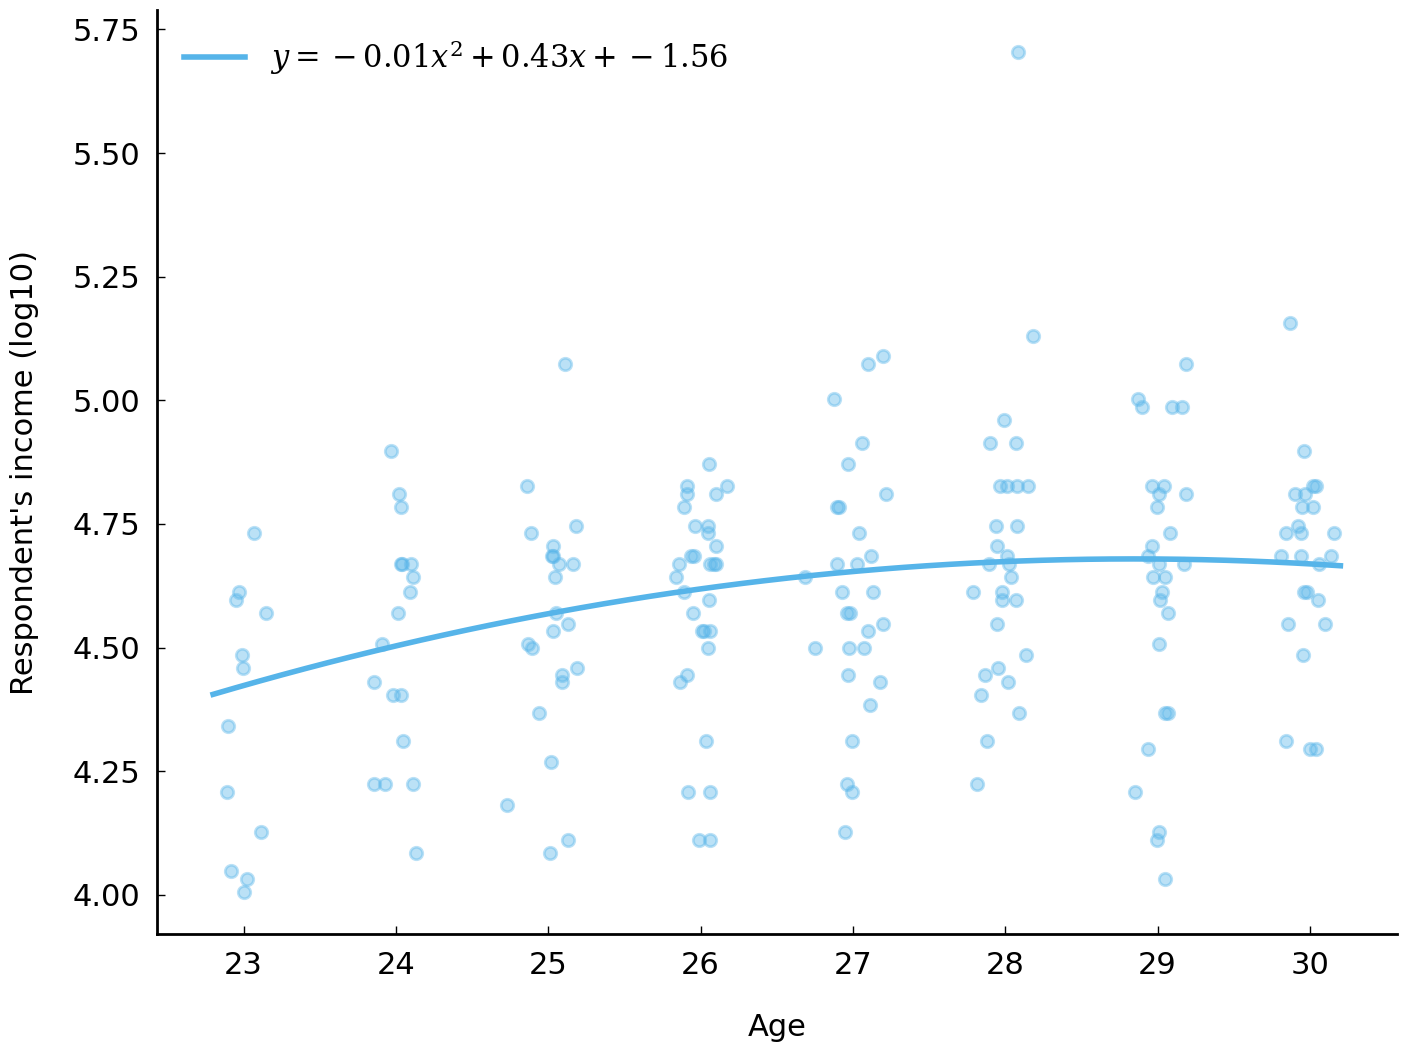

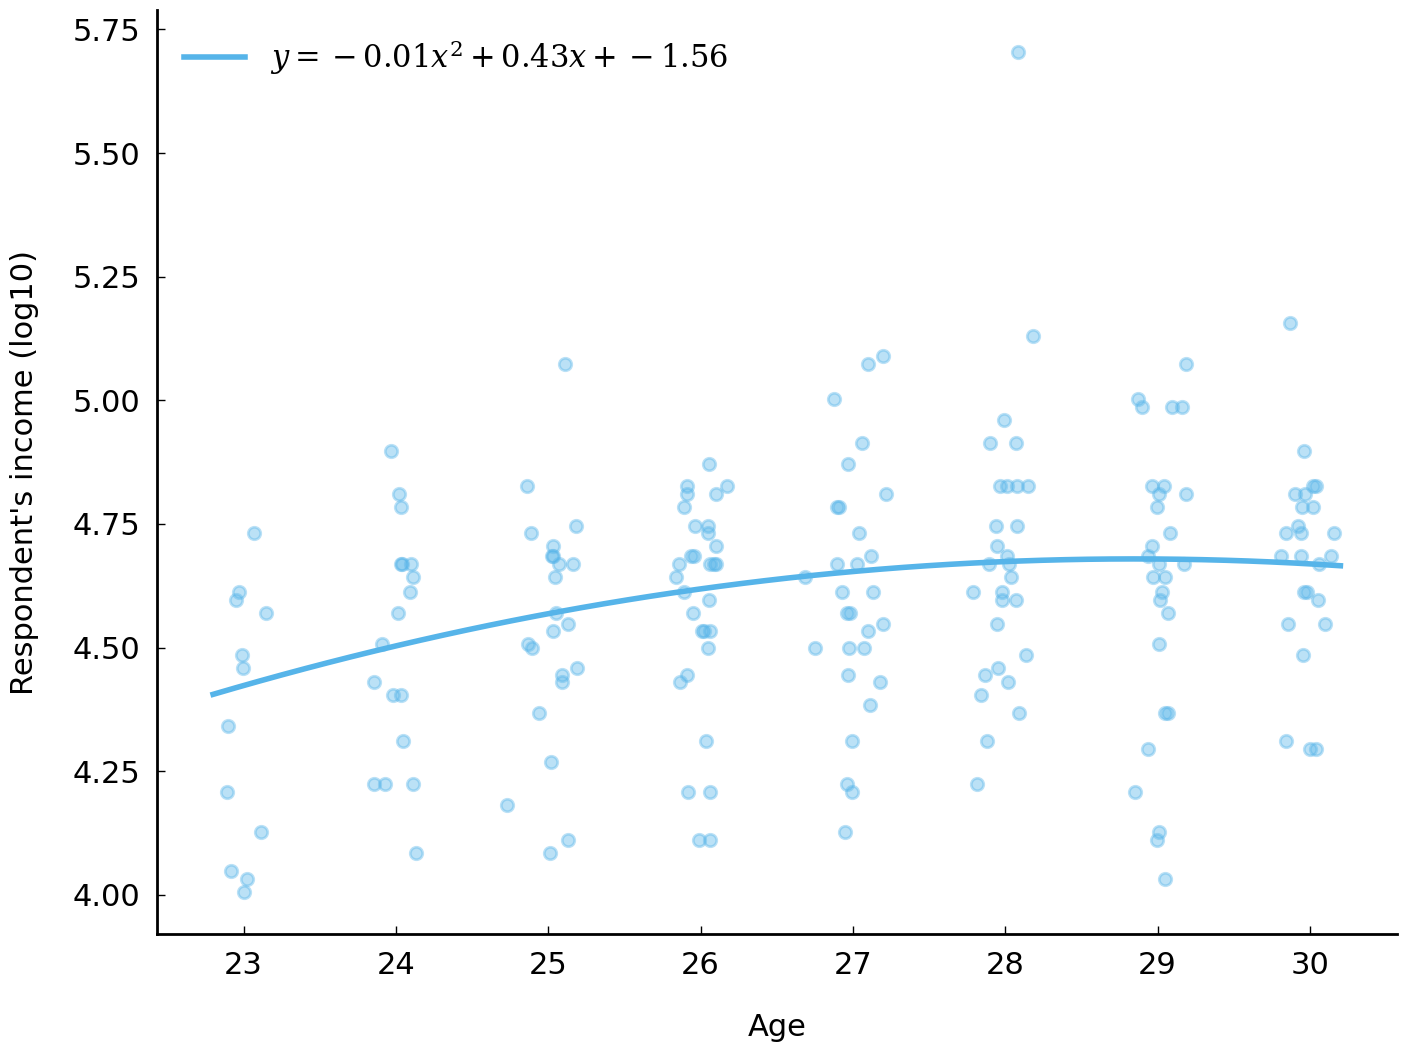

In [ ]:
# HIDE THIS CELL; CREATES PLOT
fig, ax = plt.subplots()
ax = df_subset.plot(x='age_jitter', y='realrinc2015_log10', kind='scatter', alpha=0.4, ax=ax)
coef2, coef1, intercept = np.polyfit(x, y, deg=2)
label = f'$y = {coef2:.2f}x^2 + {coef1:.2f}x + {intercept:.2f}$'
ax.plot(xs, coef1 * xs + coef2 * xs**2 + intercept, label=label)
ax.set(ylabel="Respondent's income (log10)", xlabel="Age")
ax.legend();
glue("fig_age", fig, display=False)

```{glue:figure} fig_age
---
name: fig-statistics-essentials-quadratic-household-income-age
---

Relationship between household income and age (jitter added) of respondent. The curve proposes a quadratic relationship between the two variables.
```

####  Spearman's rank correlation coefficient and Kendall's rank correlation coefficient

There are two frequently used summary statistics which express simply how reliably one variable will
increase (or decrease) as another variable increases (or decreases): <span class="index">Spearman's rank correlation
coefficient</span>, often denoted with $\rho$, and <span class="index">Kendall's rank correlation coefficient</span>, denoted $\tau$.
As their full names suggest, these statistics measure similar things. Both measures distill the
association between two variables to a single number between -1 and 1, where positive values
indicate a positive monotonic association and negative values indicate a negative monotonic association. The
``DataFrame`` class provides a method <span class="index">``DataFrame.corr()``</span> which can calculate a variety of <span class="index">correlation
coefficient</span>s, including $\rho$ and $\tau$. As the code below demonstrates, the value of $\tau$ which
describes the correlation between age and log income is positive, as we expect.

In [ ]:
df_subset[['age', 'realrinc2015_log10']].corr('kendall')

,age,realrinc2015_log10
age,1.000000,0.159715
realrinc2015_log10,0.159715,1.000000


There are innumerable other kinds of relationships between two variables that are well approximated
by mathematical functions.  Linear relationships and quadratic relationships such as those shown in
the previous two figures are two among many. For example, the productivity of many in-person
collaborative efforts involving humans----such as, say, preparing food in a restaurant's kitchen---
rapidly increases as participants beyond the first arrive (due, perhaps, to division of labor and specialization) but witnesses diminishing returns as more participants arrive. And at some point, adding more people to
the effort tends to harm the quality of the collaboration. (The idiom "too many cooks spoil the
broth" is often used to describe this kind of setting.) Such a relationship between the number of
participants and the quality of a collaboration is poorly approximated by a linear function or a
quadratic function. A better approximation is a curvilinear function of the number of participants. In such settings, adding additional workers improves the productivity of
the collaboration but eventually adding more people starts to harm productivity---but not quite at
the rate at which adding the first few workers helped. If you believe such a relationship exists
between two variables, summary statistics such as Spearman's $\rho$ and Kendall's $\tau$ are
unlikely to capture the relationship you observe. In such a setting you will likely want to model
the (non-linear) relationship explicitly.

(sec-statistics-essentials-measuring-association-categories)=
### Measuring association between categories

In historical research, <span class="index">categorical data</span> are ubiquitous. Because categorical data are often not
associated with any kind of ordering we cannot use quantitative measures of monotonic association.
(The ``pacific`` states, such as Oregon, are not greater or less than the ``new england`` states, such as
New York.) To describe the relationship between category-valued variables then, we need to look for
new statistics.

In our dataset we have several features which are neither numeric nor ordered, such as information
about where in the country a respondent grew up (``reg16``) and the highest educational degree they
have received (``degree``). The variable ``readfict`` is also
a categorical variable.  It is easy to imagine that we might want to talk about the association
between the region an individual grew up in and their answers to other questions, yet we cannot use
the statistics described in the previous section because these categories lack any widely agreed
upon ordering.  There is, for example, no sense of ordering of gender or the region the respondent
lived in at age 16, so we cannot calculate a correlation coefficient such as Kendall's $\tau$.

Traditionally, the starting point for an investigation into possible associations between two
categorical-valued variables begins with a table (a <span class="index">*contingency table*</span> or <span class="index">*cross tabulation*</span>)
recording the frequency distribution of the responses. The ``crosstab()`` function in the Pandas
library will generate these tables. The following contingency table shows all responses to the
question concerning fiction reading (``readfict``) and the question concerning the region of
residence at age 16 (``reg16``):

In [ ]:
df_subset = df.loc[df['readfict'].notnull(), ['reg16', 'readfict']]
pd.crosstab(df_subset['reg16'], df_subset['readfict'], margins=True)

readfict,yes,no,All
reg16,,,
foreign,67,33,100
new england,73,26,99
middle atlantic,198,72,270
e. nor. central,247,87,334
w. nor. central,109,28,137
south atlantic,178,98,276
e. sou. central,90,45,135
w. sou. central,123,53,176
mountain,66,31,97


Contingency tables involving categorical variables taking on a small number of possible
values (such as the one shown above) may be visualized conveniently by a stacked or
segmented bar plot. The relative density of (self-reported) fiction readers across the
regions of the United States is easier to appreciate in the visualization below, which is
created by using the ``plot.bar(stacked=True)`` method on the ``DataFrame`` created by the
<span class="index">``pandas.crosstab()``</span> function:

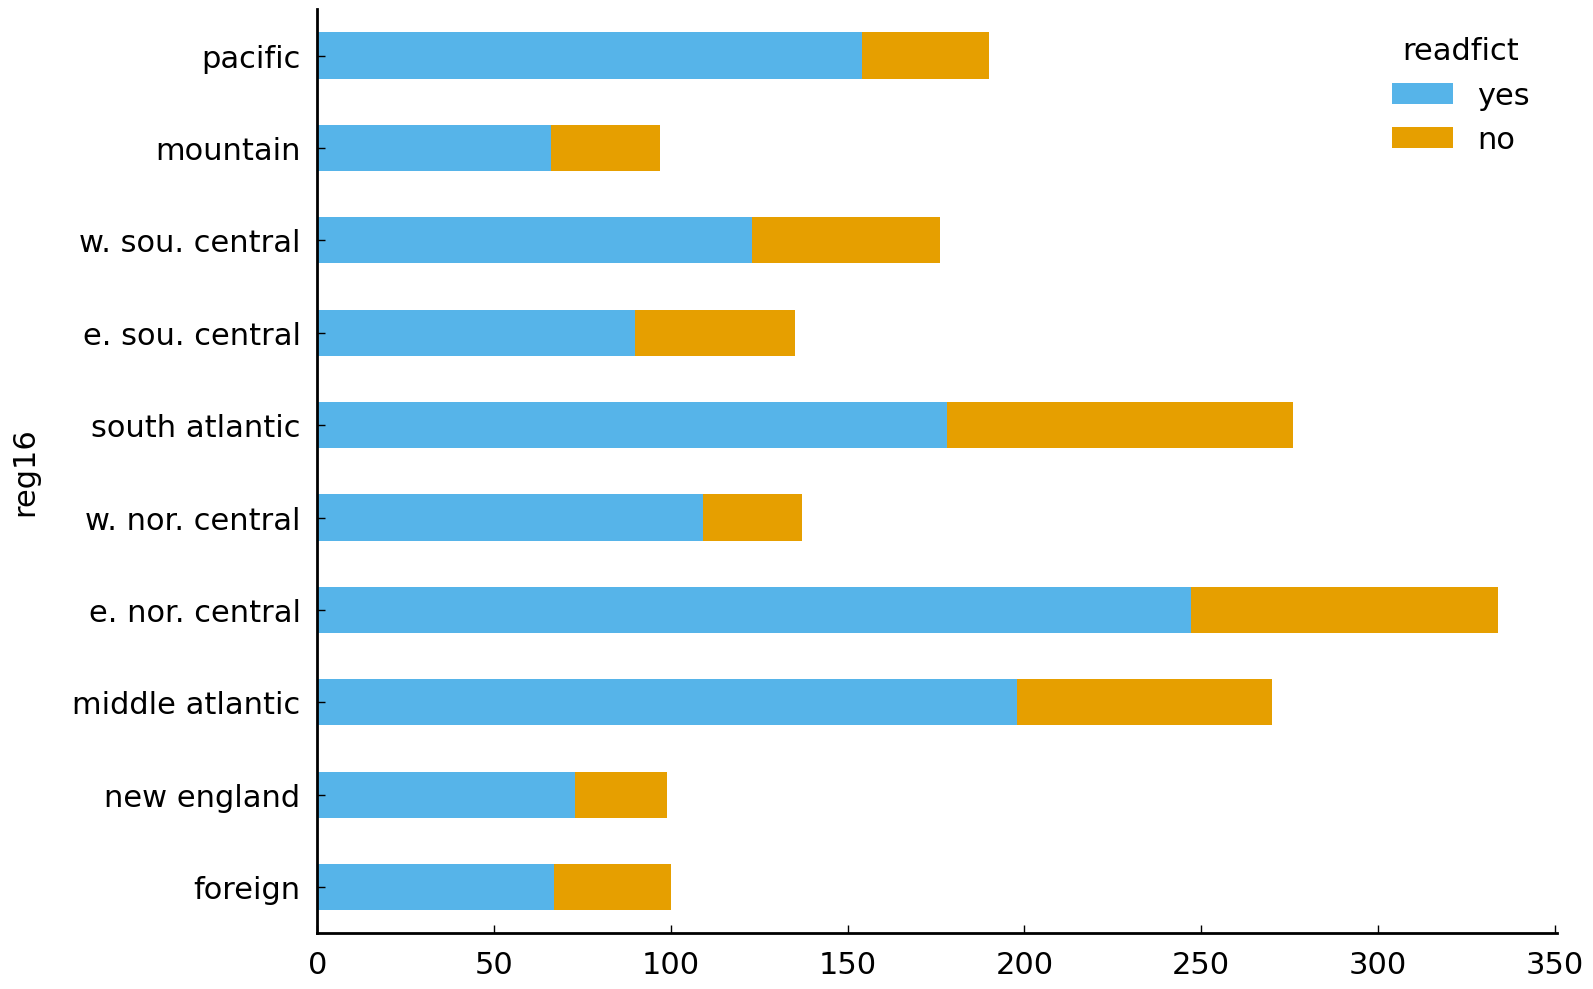

In [ ]:
pd.crosstab(df_subset['reg16'], df_subset['readfict']).plot.barh(stacked=True);
# The pandas.crosstab call above accomplishes the same thing as the call:
# df_subset.groupby('reg16')['readfict'].value_counts().unstack()

<!-- Figure: Stacked bar plot showing the relative density of fiction readers across the regions of the United States.\label{fig-statistics-essentials-fiction-reader-region} -->

While the data shown in the table has a clear interpretation, it is still difficult to extract
useful information out of it. And it would be harder still if there were many more categories. One
question to which we justifiably expect an answer from this data asks about the geographical
distribution of (self-reported) readers of fiction. Do certain regions of the United States tend to
feature a higher density of fiction readers? If they did, this would give some support to the idea
that reading literature varies spatially and warrant attention to how literature is consumed in
particular communities of readers. (This suggestion is discussed in {cite:t}`radway1991reading, 4.) Is it reasonable to believe that there is a greater density of fiction
readers in a Pacific state like Oregon than in a New England state such as New Jersey? The stacked
bar plot does let us see some of this, but we would still be hard-pressed to order all the regions
by the *density* of reported fiction reading.

We can answer this question by dismissing, for the moment, a concern about the global distribution
of responses and focusing on the *proportion* of responses which are "yes" or "no" in each region
separately. Calculating the proportion of responses within a region, given the cross tabulation,
only requires dividing by the sum of counts across the relevant axis (here the rows). To further
assist our work, we will also sort the table by the proportion of "yes" responses. The relevant
parameter for ``pandas.crosstab()`` is ``normalize``, which we need to set to ``index`` to normalize the rows.

In [ ]:
pd.crosstab(df_subset['reg16'], df_subset['readfict'], normalize='index').sort_values(
    by='yes', ascending=False)

readfict,yes,no
reg16,,
pacific,0.810526,0.189474
w. nor. central,0.795620,0.204380
e. nor. central,0.739521,0.260479
new england,0.737374,0.262626
middle atlantic,0.733333,0.266667
w. sou. central,0.698864,0.301136
mountain,0.680412,0.319588
foreign,0.670000,0.330000
e. sou. central,0.666667,0.333333


A stacked bar plot expressing the information on this table can be made using the same method
``plot.bar(stacked=True)`` that we used before:

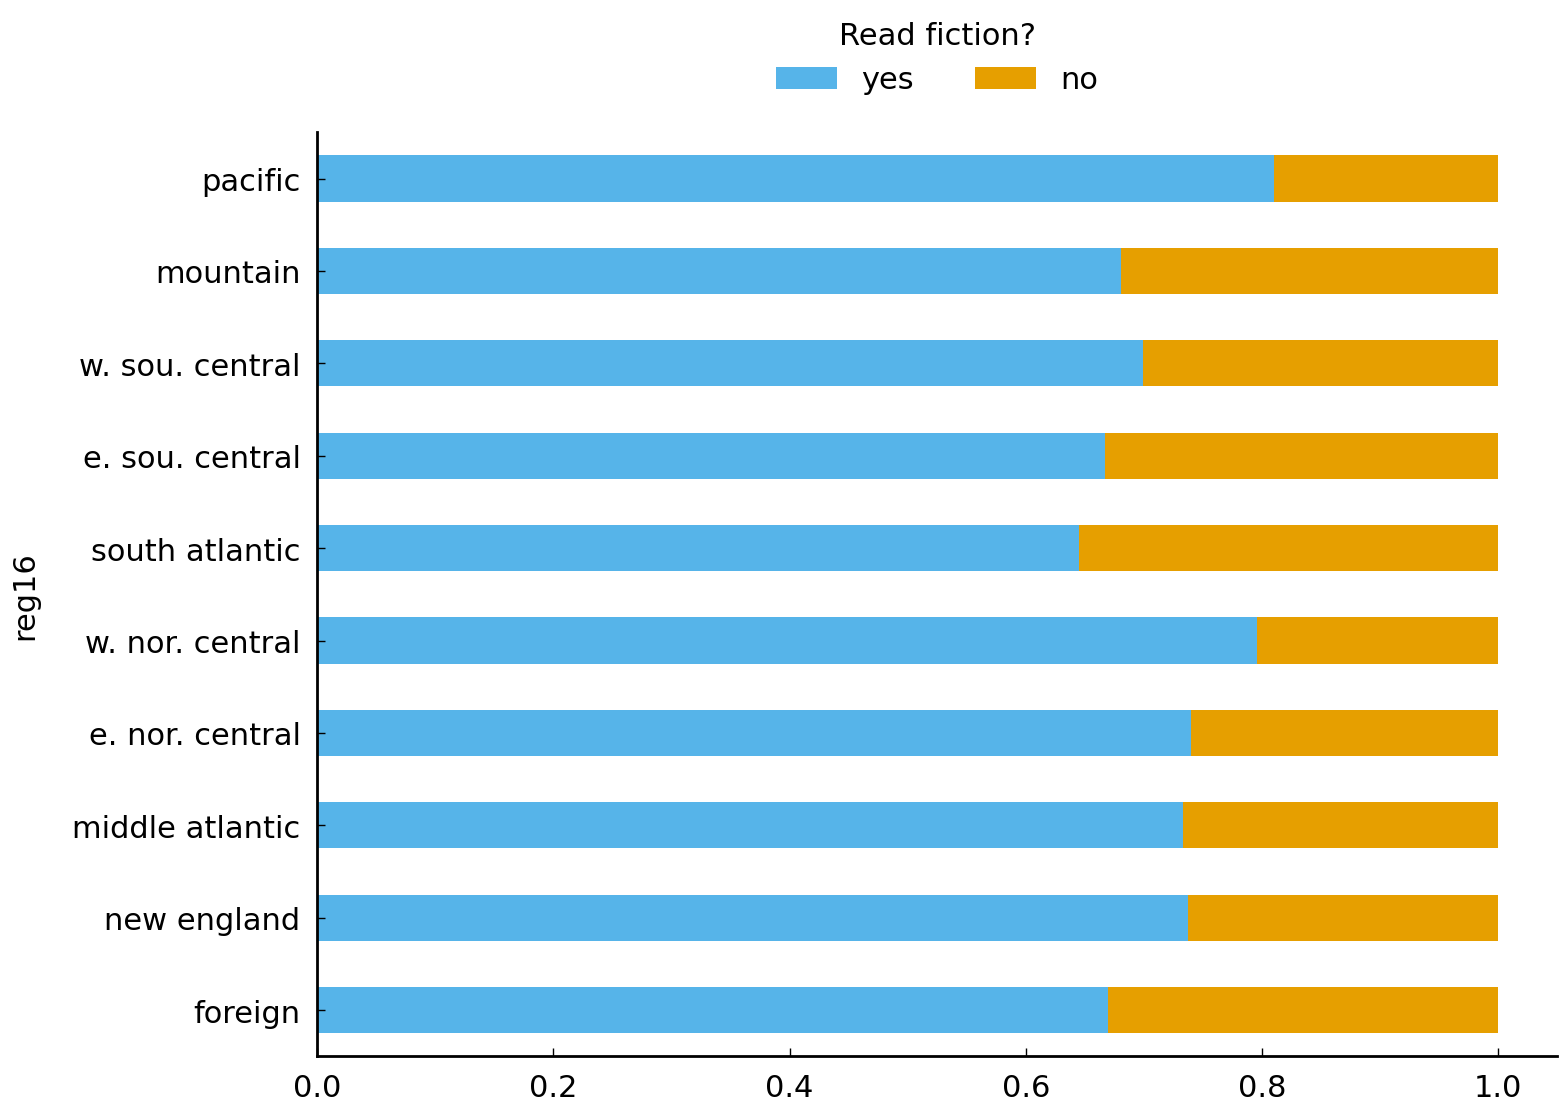

In [ ]:
pd.crosstab(
    df_subset['reg16'], df_subset['readfict'], normalize='index').plot.barh(stacked=True);
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2, title="Read fiction?");

<!-- Figure: Stacked bar plot showing proportion of fiction readers for the regions of the United States.\label{fig-statistics-essentials-fiction-reader-region-proportions} -->

From this plot it is possible to see that the observed density of ``readfict`` "yes"
responders is lowest in states assigned the ``south atlantic`` category (e.g., South
Carolina) and highest in the states assigned the ``pacific`` category.

The differences between regions are noticeable, at least visually. We have respectable sample sizes
for many of these regions so we are justified in suspecting that there may be considerable
geographical variation in the self-reporting of fiction reading. With smaller sample sizes, however, we would
worry that a difference visible in a <span class="index">stacked bar chart</span> or a <span class="index">contingency table</span> may well be due to
chance: for example, if "yes" is a common response to the ``readfict`` question and many people grew
up in a ``pacific`` state, we certainly expect to see people living in the ``pacific`` states and
reporting reading fiction in the last twelve months even if we are confident that fiction reading is
conditionally independent from the region a respondent grew up in.

### Mutual information

This brief section on mutual information assumes the reader is familiar with discrete probability distributions and random variables. Readers who have not encountered probability before may wish to skip this section.

Mutual information is a statistic which measures the dependence between two categorical variables ({cite:t}`cover2006elements`, Chp 2). If two categorical outcomes co-occur no more than random chance would predict, <span class="index">mutual information</span> will tend to be near zero. Mutual information is defined as follows:

\begin{equation}\label{eq:mutual-information}
I(X, Y) = \sum_{x \in \mathcal{X}}\sum_{y \in \mathcal{Y}} \Pr(X = x, Y = y) \log \frac{\Pr(X = x, Y = y)}{\Pr(X = x)\Pr(Y = y)}
\end{equation}

where $X$ is a random variable taking on values in the set $\mathcal{X}$ and Y is a random variable taking on values in $\mathcal{Y}$. As we did with <span class="index">entropy</span>, we use the empirical distribution of responses to estimate the joint and marginal distributions needed to calculate mutual information. For example, if we were to associate the response to ``readfict`` with $X$ and the response to ``reg10`` as $Y$, we would estimate $\Pr(X = \text{yes}, Y = \text{pacific})$ using the relative frequence of that pair of responses among all the responses recorded.

Looking closely at the <span class="index">mutual information</span> equation, it is possible to appreciate why the mutual information between two variables will be zero if the two are statistically independent: each $\frac{\Pr(X=x,Y=y)}{\Pr(X=x)\Pr(Y=y)}$ term in the summation will be 1 and the mutual information (the sum of the logarithm of these terms) will be zero as $\log 1 = 0$. When two outcomes co-occur more often than chance would predict the term $\frac{\Pr(X=x,Y=y)}{\Pr(X=x)Pr(Y=y)}$ will be greater than 1.

We will now calculate the mutual information for responses to the ``reg16`` question and answers to the
``readfict`` question.

In [ ]:
# Strategy:
# 1. Calculate the table of Pr(X=x, Y=y) from empirical frequencies
# 2. Calculate the marginal distributions Pr(X=x)Pr(Y=y)
# 3. Combine above quantities to calculate the mutual information.

joint = pd.crosstab(df_subset['reg16'], df_subset['readfict'], normalize='all')

# construct a table of the same shape as joint with the relevant
# values of Pr(X = x)Pr(Y = y)
proba_readfict, proba_reg16 = joint.sum(axis=0), joint.sum(axis=1)
denominator = np.outer(proba_reg16, proba_readfict)

mutual_information = (joint * np.log(joint / denominator)).sum().sum()
print(mutual_information)

0.006902379486167156


In the cell above we've used the function <span class="index">``numpy.outer()``</span> to quickly construct a table of the
pairwise products of the two probability distributions. Given an array $v$ of length $n$ and an
array $u$ of length $m$, ``numpy.outer()`` will multiply elements from the two arrays to construct an
$n \times m$ array where the entry with index $i, j$ is the product of the $i$th entry of $v$ and
the $j$th entry of $v$.

Mutual information is always non-negative. Higher values indicate greater dependence. Performing the same calculation using the `degree` variable and the `readfict` variable we find a higher mutual information.

There are many applications of <span class="index">mutual information</span>. This section has documented the quantity's usefulness for assessing whether or not two variables are statistically independent and for ordering pairs of categorical variables based on their degree of dependence.


(sec-statistics-essentials-conclusion)=
## Conclusion

This chapter reviewed the use of common <span class="index">summary statistics</span> for
location, dispersion, and association. When distributions of variables are regular,
summary statistics are often all we need to communicate information about the
distributions to other people. In other cases, we are forced to use summary statistics
because we lack the time or memory to store all the observations from a phenomenon of
interest. In the preceding sections, we therefore saw how summary statistics could be used
to describe salient patterns in responses to the GSS, which is a very useful study in
which to apply these summary statistics.

It should be clear that this chapter has only scratched the surface: scholars nowadays
have much more complex statistical approaches at their disposal in the (Python) data
analysis ecosystem. Nevertheless, calculating simple summary statistics for variables
remains an important first step in any data analysis, especially when still in exploratory
stages. Summary statistics help one think about the distribution of variables, which is
key to carrying out (and reporting) sound quantitative analyses for larger
datasets---which a scholar might not have created herself or himself and thus might be
unfamiliar with. Additionally, later in this book, the reader will notice how seemingly simple means and variances are often the basic components of more complex approaches. Burrows's Delta, to name but one example, is a distance measure from stylometry which a researcher will not be able to fully appreciate without a solid understanding of concepts such as mean and standard deviation.

The final section of this chapter looked into a number of basic ways of measuring the
association between variables. Summary measures of association often usefully sharpen our
views of the correlations that typically are found in many datasets and can challenge us
to come up with more parsimonious descriptions of our data. Here too, the value of simple
and established statistics for communicating results should be stressed: one should think
twice about using a more complex analysis, if a simple and widely understood statistic can do the job.

(sec-statistics-essentials-further-reading)=
## Further Reading

While it is not essential to appreciate the use of summary statistics, an understanding of
probability theory allows for a deeper understanding of the origins of many familiar summary statistics. For an excellent introduction to probability, see {cite:t}`grinstead2012introduction`. Mutual
information is covered in chapter 2 of {cite:t}`cover2006elements`.